In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants

# Experimento 1: Espelhos girantes #


In [2]:
df_eg = pd.read_csv("eg_data.csv", header=0)
df_eg.head()

,f(Hz),desvio_f(Hz),ds(mm),desvio_ds(mm)
0,207.3,0.16,0.88,0.2
1,263.6,0.81,1.31,0.2
2,328.4,0.71,1.08,0.2
3,395.2,1.07,1.90,0.2
4,457.9,0.62,2.32,0.2


coefficient of determination: 0.9843725151599755
slope: [0.00496405], intercept: -0.14229803393986318
velocity of light: [3.68664065e+08]


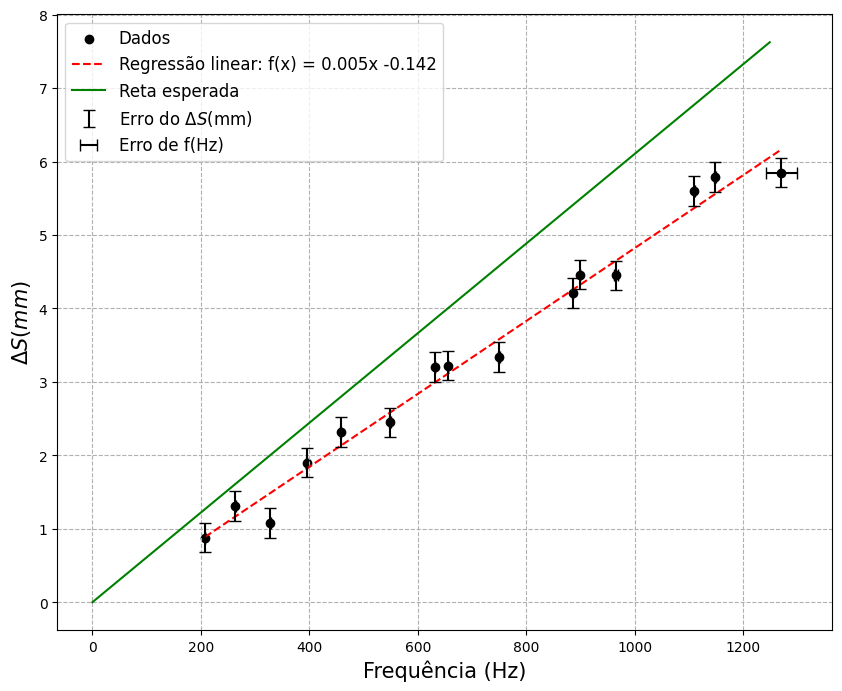

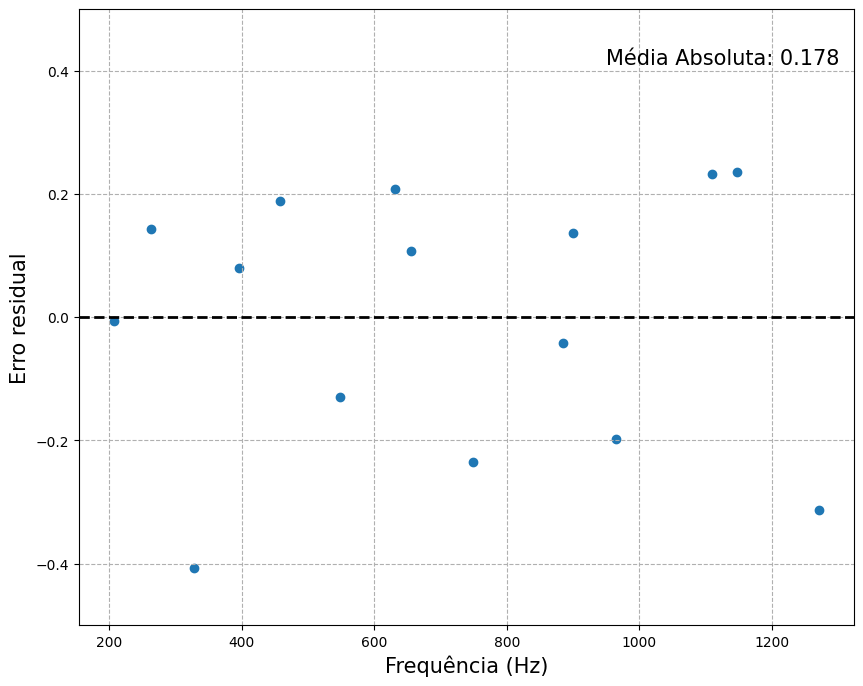

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x = np.array(df_eg[df_eg.columns[0]]).reshape(-1,1)
y = np.array(df_eg[df_eg.columns[2]])

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"slope: {model.coef_},", f"intercept: {model.intercept_}")

y_pred = model.predict(x)

error = y - y_pred
mean_abs = mean_absolute_error(y, y_pred)

R = 4.8
d = 15.17
v = ((8 * np.pi * R * d) / (model.coef_)) * 10 ** 3
print(f"velocity of light: {v}") #m/s

x_real = np.arange(0, 1250, 1)

y_real = (((8 * np.pi * R * d) / constants.c) * x_real) * (10 ** 3)

plt.figure(figsize=(10,8))
plt.scatter(x, y, color='black',label='Dados')
plt.plot(x, y_pred, color='red', linestyle="--", label=f'Regressão linear: f(x) = {model.coef_[0]:.3f}x {model.intercept_:.3f}')
plt.plot(x_real, y_real, color='green', linestyle="-", label=f'Reta esperada')
plt.errorbar(df_eg[df_eg.columns[0]], y, yerr = df_eg[df_eg.columns[3]], fmt='none', ecolor='black', capsize=4, label=r'Erro do $\Delta S$(mm)')
plt.errorbar(df_eg[df_eg.columns[0]], y, xerr = df_eg[df_eg.columns[1]], fmt="none", ecolor="black", capsize=4, label="Erro de f(Hz)")
plt.xlabel("Frequência (Hz)", fontsize=15)
plt.ylabel(r"$\Delta S (mm)$", fontsize=15)
plt.grid(True, linestyle='--')
plt.legend(fontsize = 12)
plt.show()

# Plot the error

plt.figure(figsize=(10,8))
plt.scatter(x, error)
plt.xlabel("Frequência (Hz)", fontsize=15)
plt.ylabel("Erro residual", fontsize=15)
plt.ylim(-0.5,0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.grid(True, linestyle='--')
plt.text(950, 0.41, s=f"Média Absoluta: {mean_abs:.3f}", fontsize=15)
plt.show()

395004573.53929394


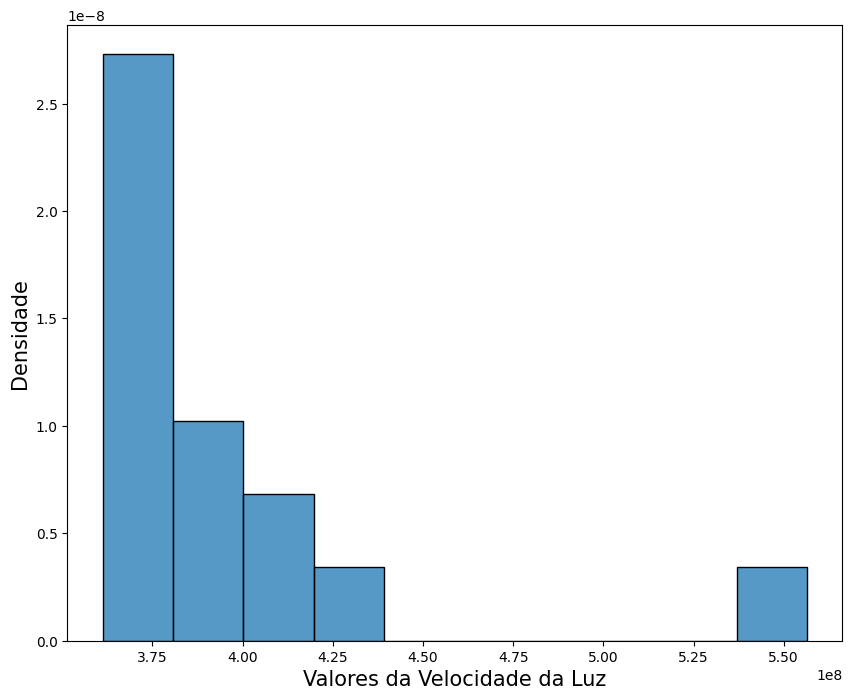

In [9]:
#Histograma Espelho Girante

f = df_eg['f(Hz)']
ds = df_eg[df_eg.columns[2]]
v_col = []

for i in np.arange(len(f)):
  v_col.append(8*np.pi*f[i]*4.8*15.17*10**3/ds[i])

print(np.mean(np.array(v_col)))

plt.figure(figsize=(10,8))
sns.histplot(x=v_col, bins=10, stat="density")
plt.ylabel("Densidade", fontsize=15)
plt.xlabel("Valores da Velocidade da Luz", fontsize=15)
plt.show()


# Experimento 2: Pulsos #


In [11]:
df2 = pd.read_csv("dados_pulso.csv", header=0)
df2.head()

,Distância,Tempo
0,0.000,0.000000e+00
1,14.970,4.600000e-08
2,20.064,6.600000e-08
3,25.810,9.000000e-08
4,30.840,1.100000e-07


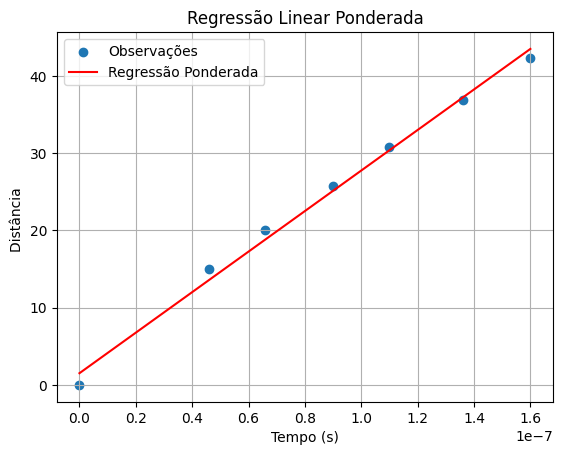

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_weights(residuals):
    # Calcula os pesos com base nos resíduos
    weights = 1 / (np.abs(residuals) + 1)
    return weights

def weighted_linear_regression(X, y, weights):
    # Adiciona uma coluna de 1s para o viés
    X_augmented = np.c_[np.ones(X.shape[0]), X]

    # Calcula a matriz de covariância ponderada
    C = np.diag(weights)

    # Calcula os coeficientes da regressão ponderada
    w_wlr = np.linalg.inv(X_augmented.T @ np.linalg.inv(C) @ X_augmented) @ (X_augmented.T @ np.linalg.inv(C) @ y)

    return w_wlr

# Extrai os valores de X e y
X = df2['Tempo']
y = df2['Distância']

# Calcula a regressão linear com pesos
# Solução da regressão linear
w_lr = np.linalg.inv(np.c_[np.ones(X.shape[0]), X].T @ np.c_[np.ones(X.shape[0]), X]) @ np.c_[np.ones(X.shape[0]), X].T @ y

# calculate residuals
residuals = y - np.c_[np.ones(X.shape[0]), X] @ w_lr

# calculate weights
weights = calculate_weights(residuals)

# Calcula os coeficientes da regressão ponderada
w_wlr = weighted_linear_regression(X, y, weights)

# Gera o conjunto de recursos para plotagem
X_plot = np.linspace(X.min(), X.max(), 100)
X_plot_augmented = np.c_[np.ones(100), X_plot]

# Calcula as previsões
y_pred = X_plot_augmented @ w_wlr

intercept = w_wlr[0]
slope = w_wlr[1]

# Plota os resultados
plt.scatter(X, y, label='Observações')
plt.plot(X_plot, y_pred, color='red', label='Regressão Ponderada', )
plt.xlabel('Tempo (s)')
plt.ylabel('Distância ')
plt.title('Regressão Linear Ponderada')
plt.legend()
plt.grid(True)
plt.show()

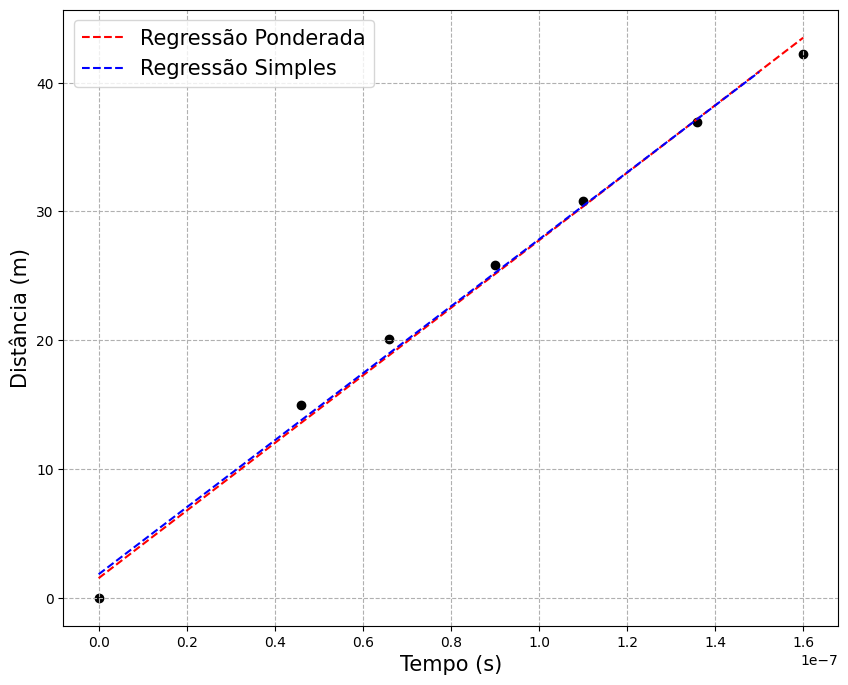

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr2 = LinearRegression()
model = lr.fit(np.array(df2["Tempo"]).reshape(-1,1), df2["Distância"])
model2 = lr2.fit(np.array(df2["Tempo"]).reshape(-1,1), df2["Distância"])


x = np.arange(0e-8, 1.7e-7, 2.5e-8)
y = model.predict(np.array(x).reshape(-1,1))
y2 = model2.predict(np.array(x).reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(df2["Tempo"], df2["Distância"], c="black")
plt.plot(X_plot, y_pred, color='red', label='Regressão Ponderada', linestyle="--")
plt.plot(x, y2, linestyle="--", label="Regressão Simples", c="b")
plt.grid(True, linestyle="--")
plt.xlabel("Tempo (s)", fontsize=15)
plt.ylabel("Distância (m)", fontsize=15)
plt.legend(fontsize=15)
plt.show()



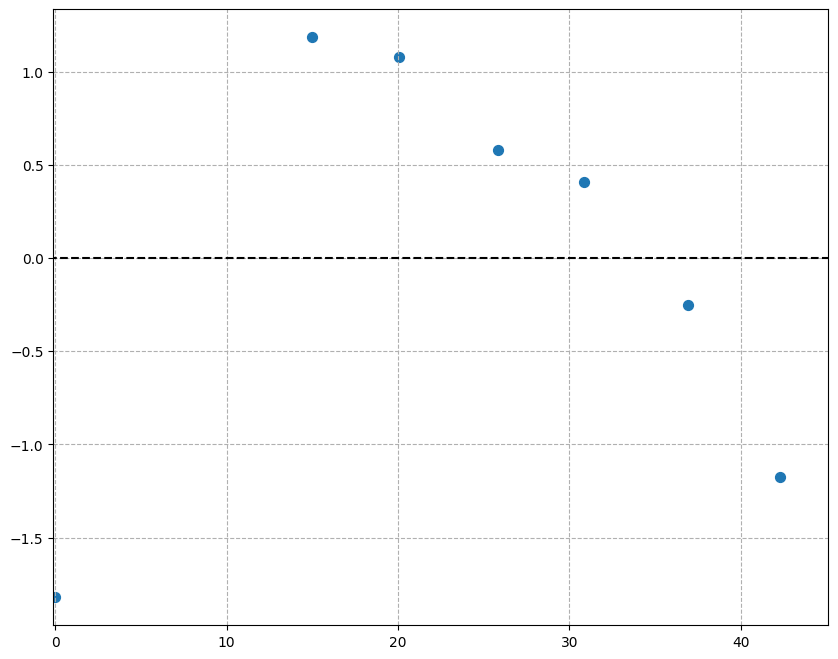

In [19]:
y_pred = model.predict(np.array(df2["Tempo"]).reshape(-1,1))
erro = df2["Distância"] - y_pred

plt.figure(figsize=(10,8))
plt.grid(True, linestyle='--')
plt.scatter(df2["Distância"], erro, s=50)
plt.hlines(y=0, xmin=-1, xmax=46, linestyle="--", colors='black')
plt.xlim(-0.1,45.1)
plt.show()

In [20]:
dfp =  pd.read_csv("pulses_data.csv", header=0)
dfp.head()

,2_time1(ch1),2_voltage1(ch1),3_time1(ch1),3_voltage1(ch1),4_time1(ch1),4_voltage1(ch1),5_time1(ch1),5_voltage1(ch1),6_time1(ch1),6_voltage1(ch1),7_time1(ch1),7_voltage1(ch1)
0,-2.680000e-07,0.0,-1.250000e-07,0.00,-1.250000e-07,-0.008,-2.680000e-07,-0.008,-2.680000e-07,0.0,-2.680000e-07,0.0088
1,-2.678000e-07,0.0,-1.249000e-07,0.00,-1.249000e-07,-0.008,-2.678000e-07,-0.008,-2.678000e-07,0.0,-2.678000e-07,0.0096
2,-2.676000e-07,0.0,-1.248000e-07,0.00,-1.248000e-07,-0.008,-2.676000e-07,-0.008,-2.676000e-07,0.0,-2.676000e-07,0.0096
3,-2.674000e-07,0.0,-1.247000e-07,0.00,-1.247000e-07,-0.008,-2.674000e-07,-0.008,-2.674000e-07,0.0,-2.674000e-07,0.0088
4,-2.672000e-07,0.0,-1.246000e-07,0.02,-1.246000e-07,-0.008,-2.672000e-07,0.000,-2.672000e-07,0.0,-2.672000e-07,0.0080


In [22]:
!pip install findpeaks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ecf8c7c3bce2207a8fe632a9ce07de795442f417ea3275b10f0a706a44d9c0df
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


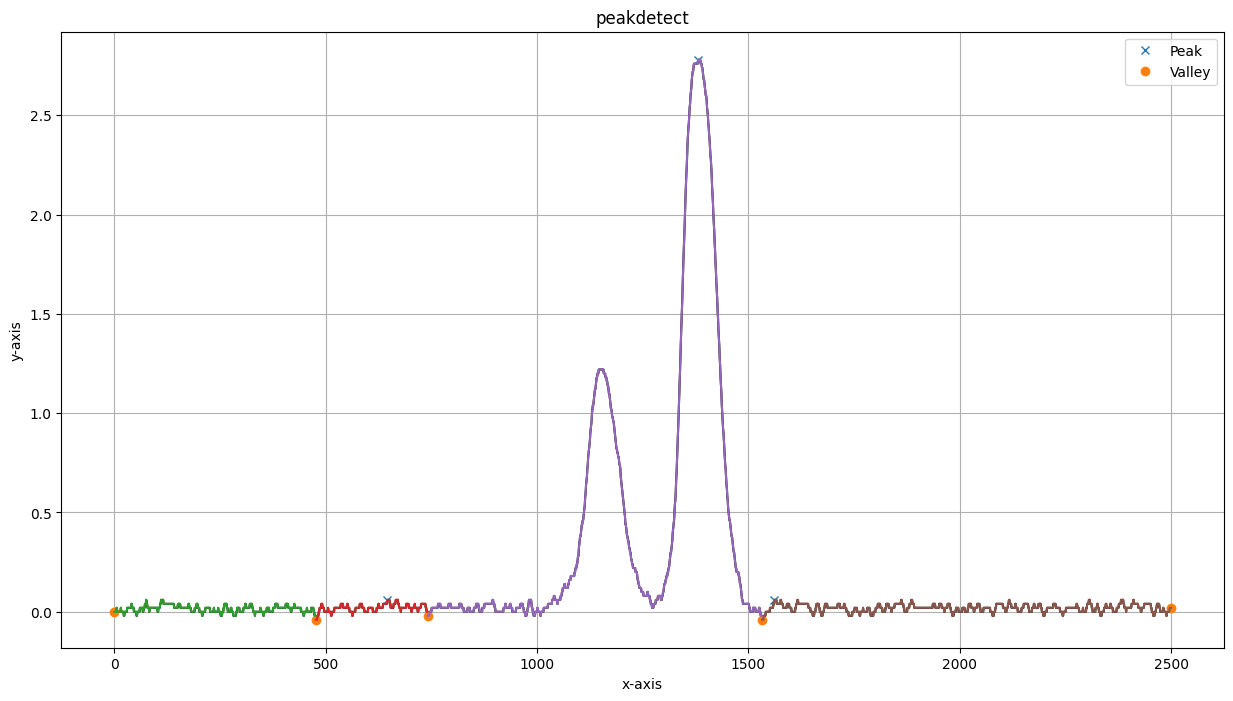

max [ 646 1381 1561]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


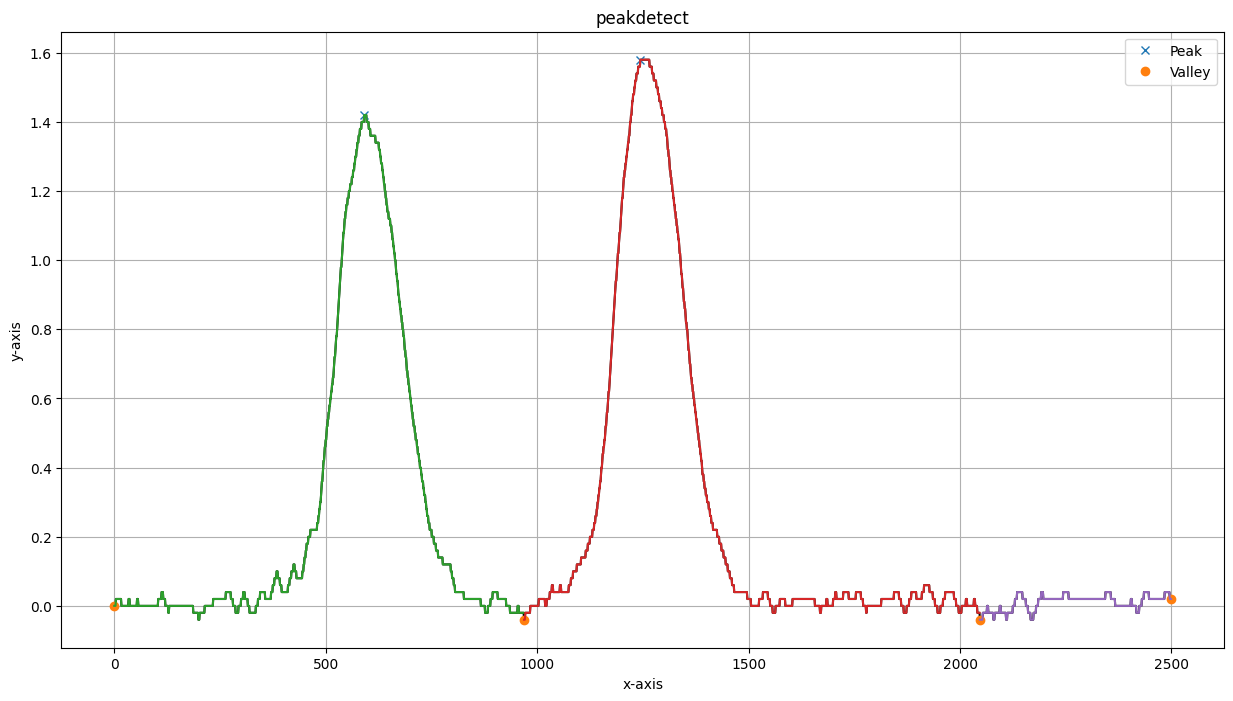

max [ 591 1244]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


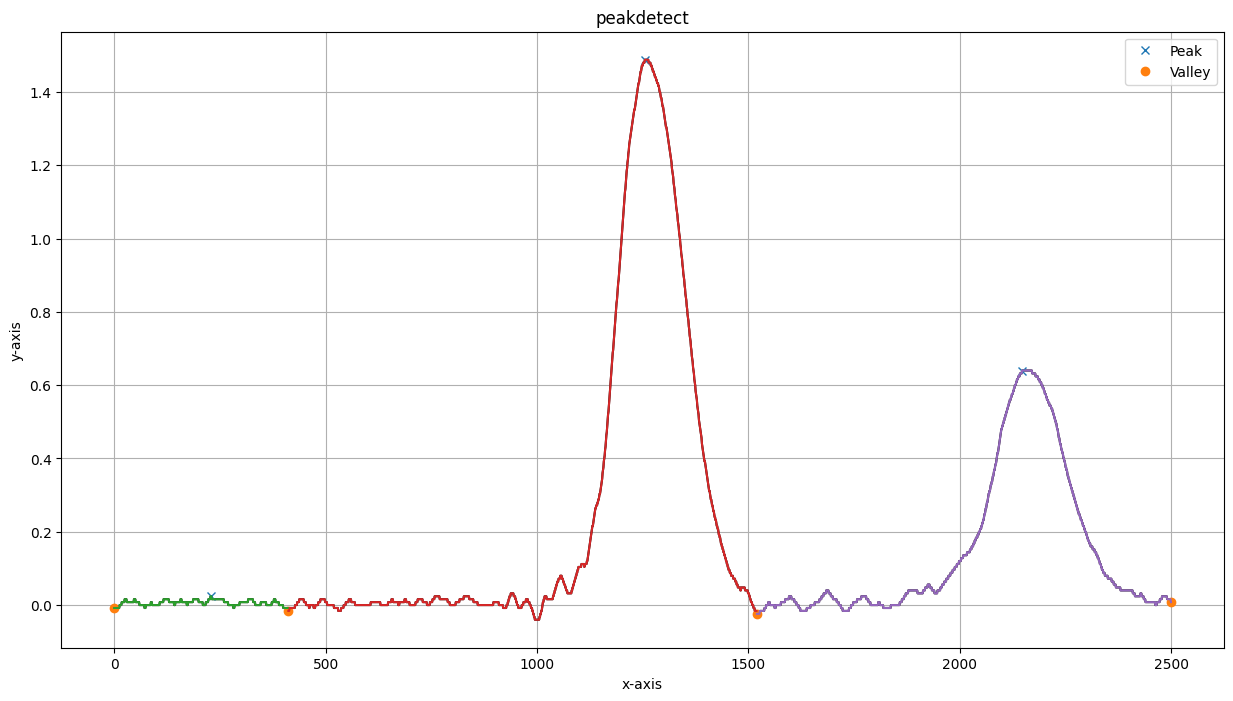

max [ 228 1255 2147]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


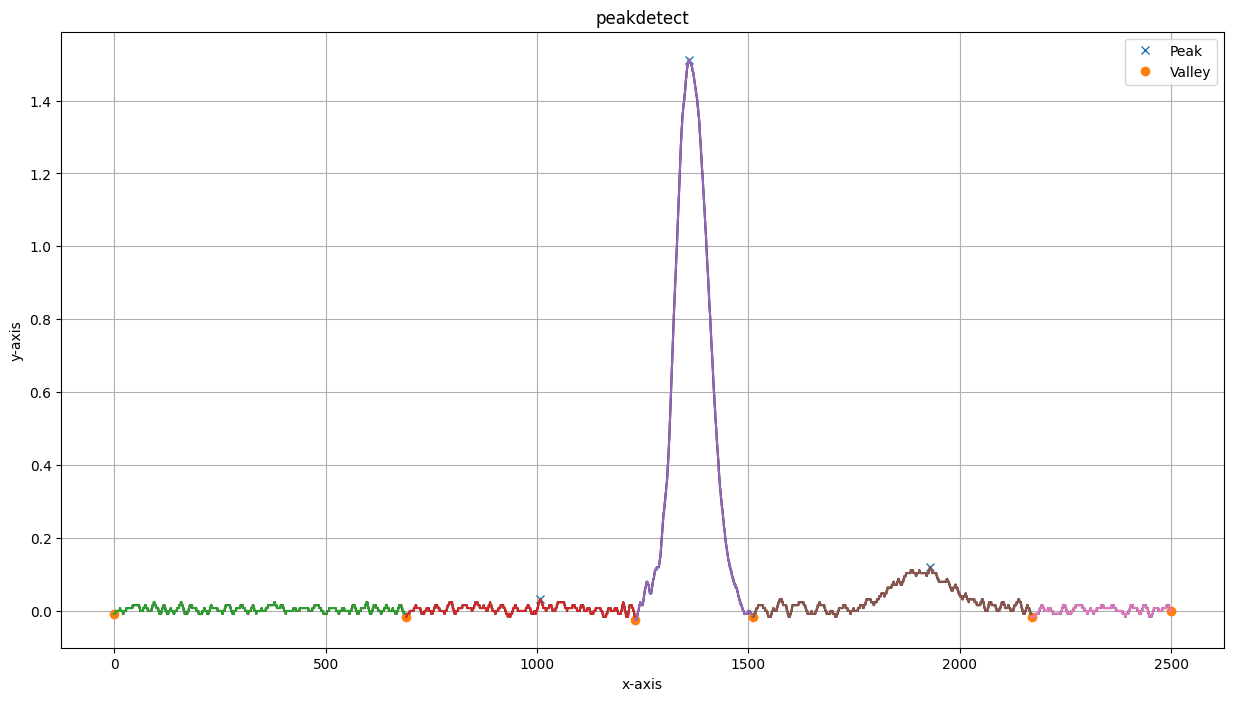

max [1007 1359 1929]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


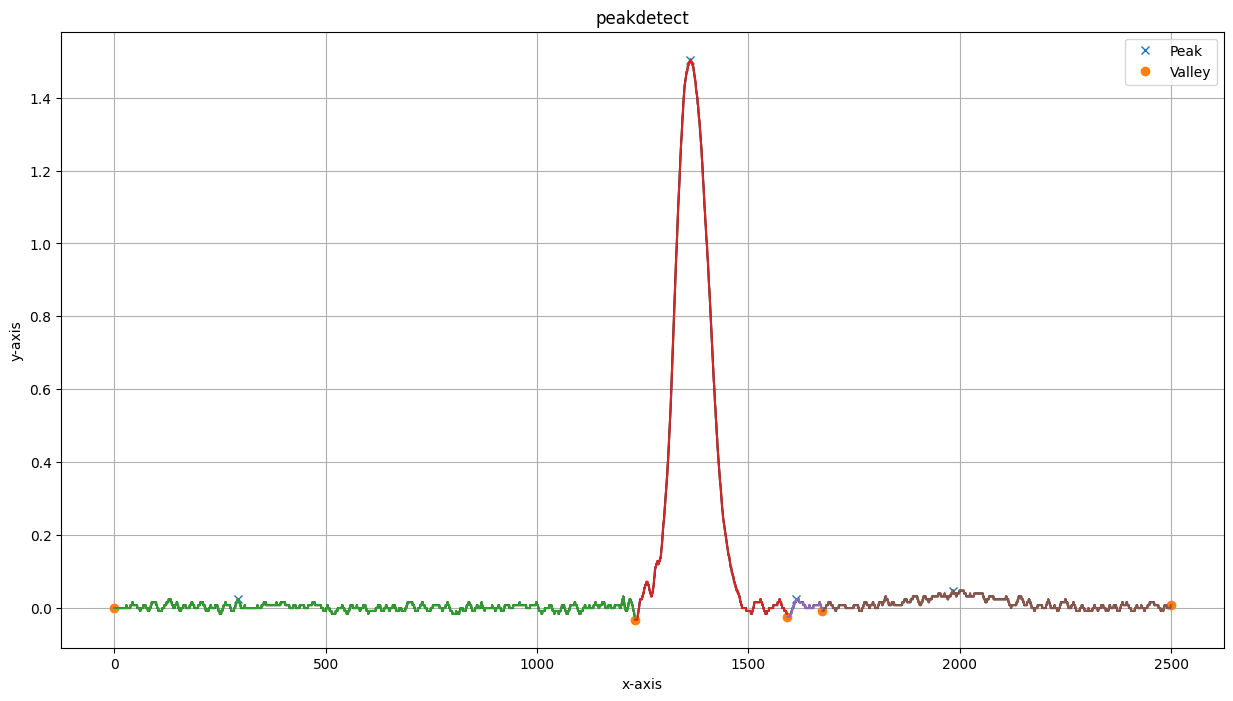

max [ 292 1362 1613 1983]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


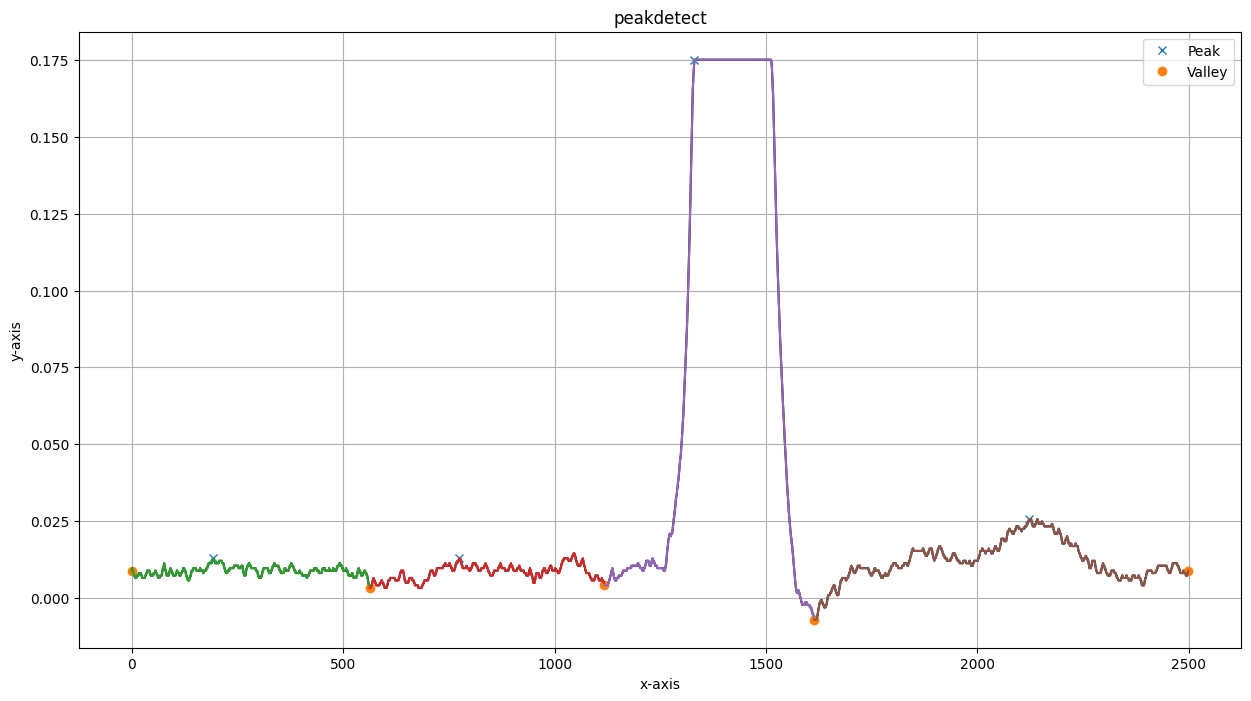

max [ 192  775 1331 2122]
Valores medidos de delta T:
0-2: [4.64e-08]
0-3: [6.61e-08]
0-4: [9.e-08]
0-5: [1.146e-07]
0-6: [1.29e-07]


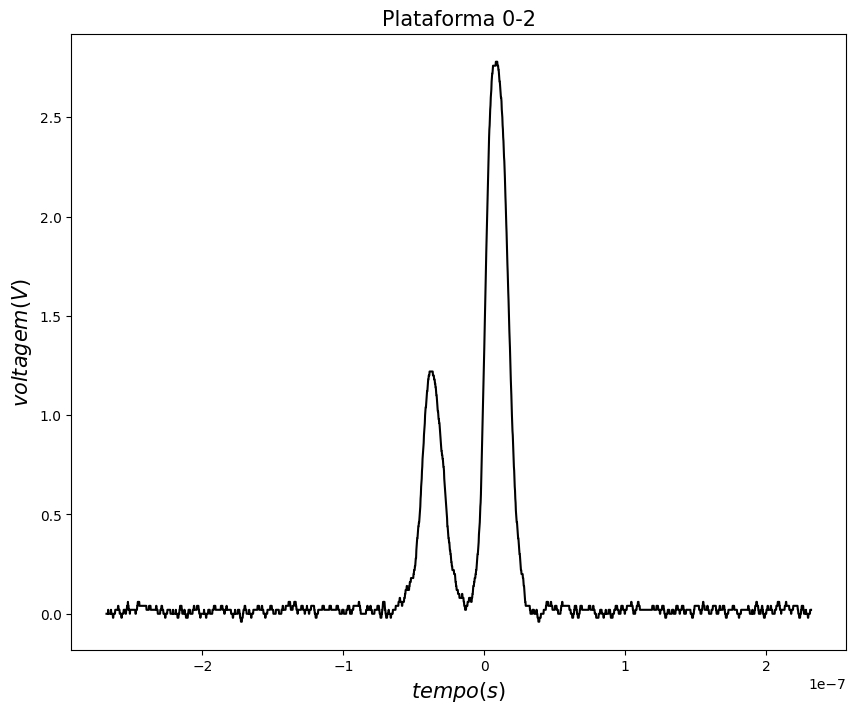

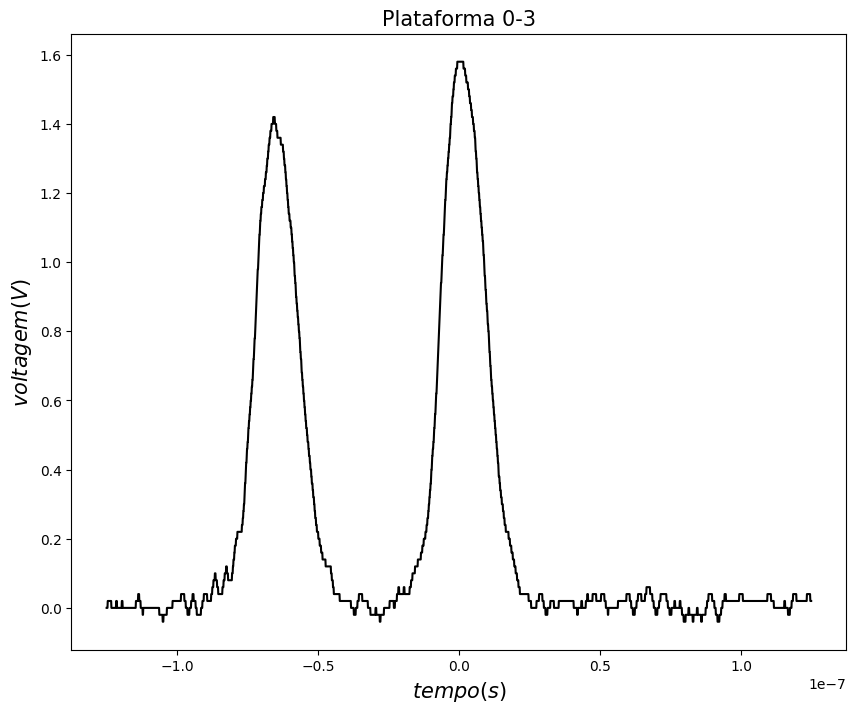

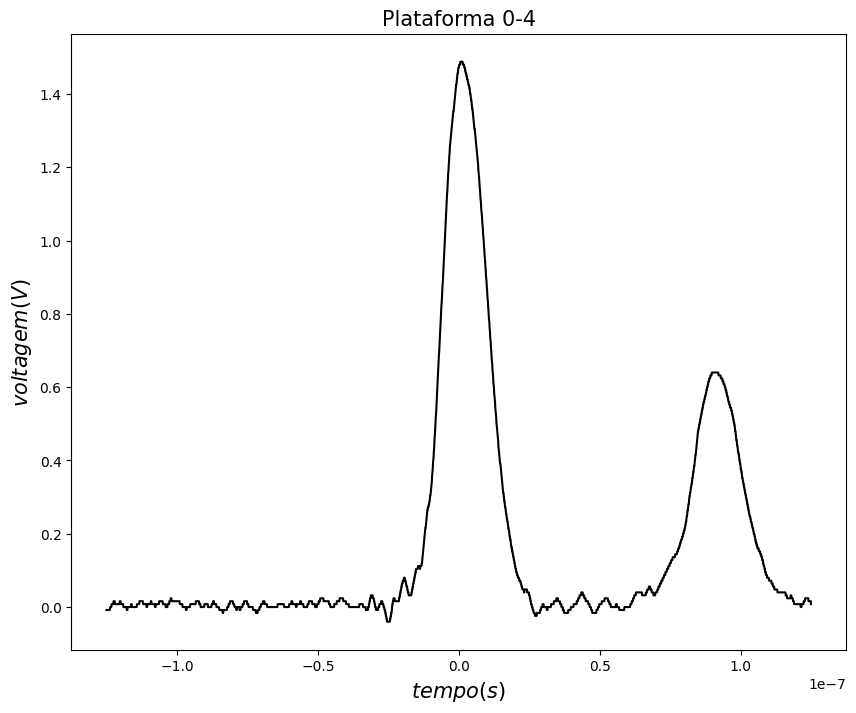

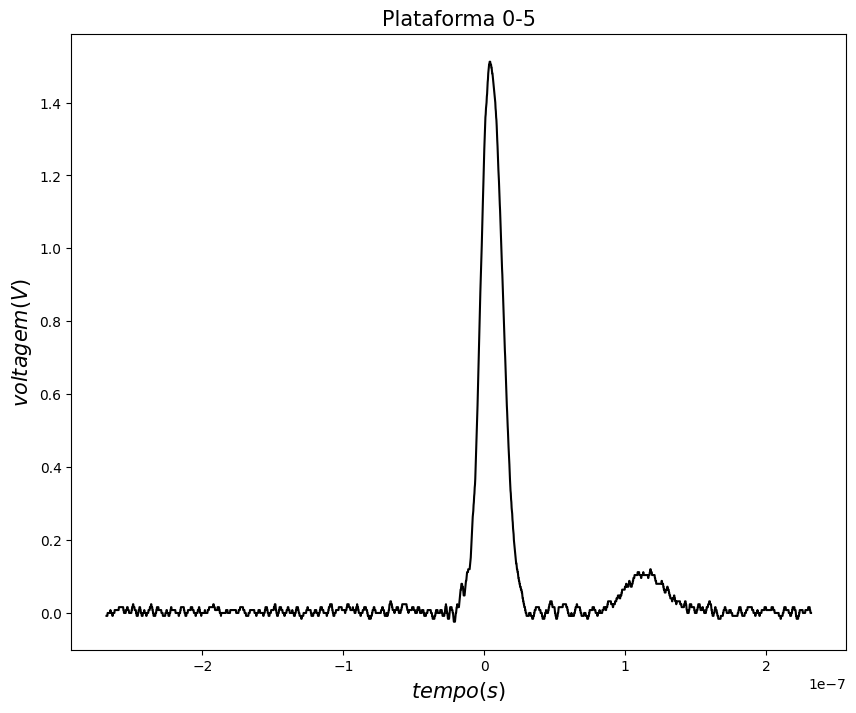

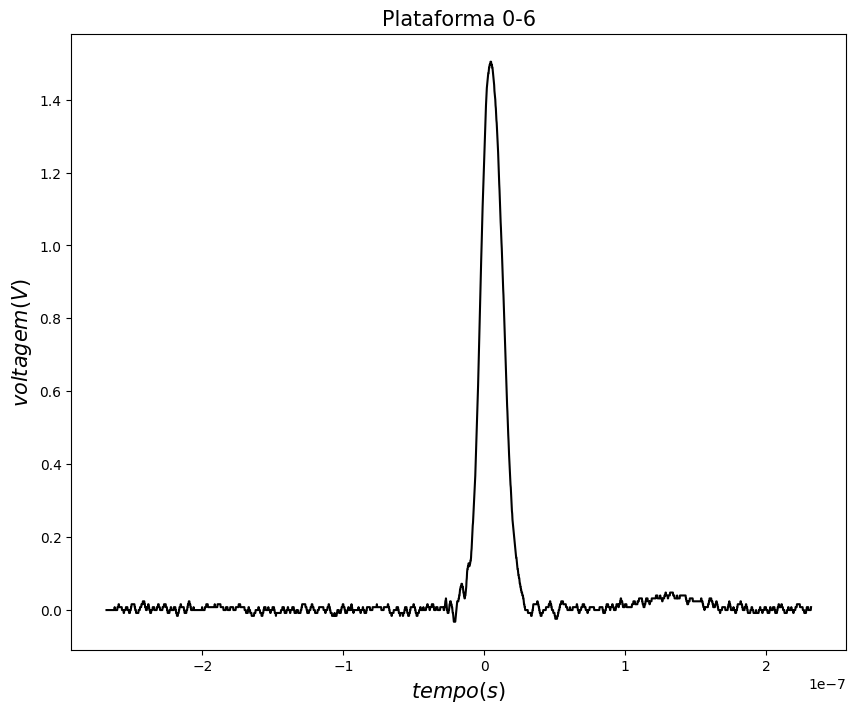

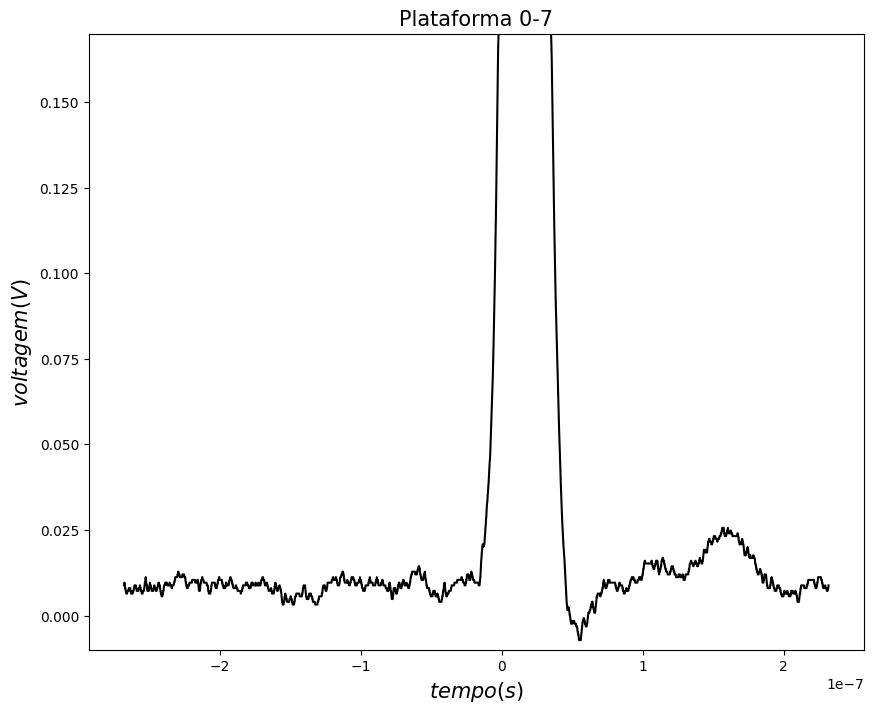

In [29]:
import numpy as np
from findpeaks import findpeaks
from scipy.signal import argrelextrema

x1 = np.array(dfp["2_time1(ch1)"]).reshape(-1,1)
y1 = np.array(dfp["2_voltage1(ch1)"])

x2 = np.array(dfp["3_time1(ch1)"]).reshape(-1,1)
y2 = np.array(dfp["3_voltage1(ch1)"])

x3 = np.array(dfp["4_time1(ch1)"]).reshape(-1,1)
y3 = np.array(dfp["4_voltage1(ch1)"])

x4 = np.array(dfp["5_time1(ch1)"]).reshape(-1,1)
y4 = np.array(dfp["5_voltage1(ch1)"])

x5 = np.array(dfp["6_time1(ch1)"]).reshape(-1,1)
y5 = np.array(dfp["6_voltage1(ch1)"])

x6 = np.array(dfp["7_time1(ch1)"]).reshape(-1,1)
y6 = np.array(dfp["7_voltage1(ch1)"])

#0_2
fp = findpeaks(method='peakdetect')
results = fp.fit(y1)
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

#0_3
fp = findpeaks(method='peakdetect')
results = fp.fit(y2)
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

#0_4
fp = findpeaks(method='peakdetect')
results = fp.fit(y3)
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

#0_5
fp = findpeaks(method='peakdetect')
results = fp.fit(y4)
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

#0_6
fp = findpeaks(method='peakdetect')
results = fp.fit(y5)
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

#0_7
fp = findpeaks(method='peakdetect')
results = fp.fit(y6)
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

print("Valores medidos de delta T:")
print("0-2:", abs(x1[1385] - x1[1153]))
print("0-3:", abs(x2[1256] - x2[595]))
print("0-4:", abs(x3[2160] - x3[1260]))
print("0-5:", abs(x4[1932] - x4[1359]))
print("0-6:", abs(x5[2007] - x5[1362]))


plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.title(r"Plataforma 0-2", fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x2, y2, color='black',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.title(r"Plataforma 0-3", fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x3, y3, color='black',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.title(r"Plataforma 0-4", fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x4, y4, color='black',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.title(r"Plataforma 0-5", fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x5, y5, color='black',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.title(r"Plataforma 0-6", fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x6, y6, color='black',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.ylim(-0.01,0.170)
plt.title(r"Plataforma 0-7", fontsize=15)
plt.show()


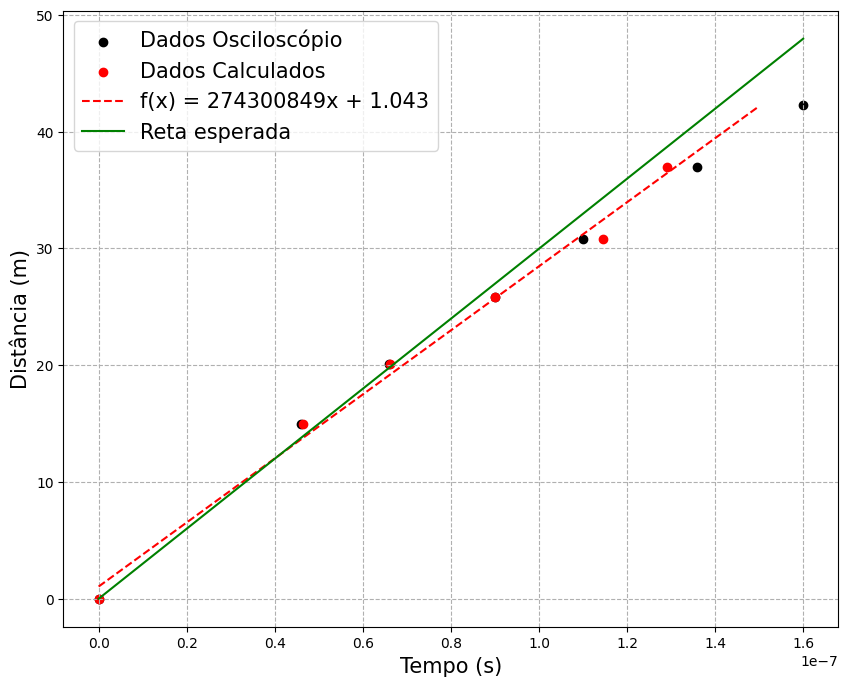

In [33]:
from scipy import constants

time_pulses = [0, 4.64e-08, 6.61e-08, 9e-08, 1.146e-07, 1.29e-07]
distance = [0, 14.97, 20.064, 25.81, 30.84, 36.94]

df_calc = {
    "tempo" : time_pulses,
    "dist" : distance
}

df_calc = pd.DataFrame(df_calc)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(np.array(df_calc["tempo"]).reshape(-1,1), df_calc["dist"])

x = np.arange(0e-8, 1.7e-7, 2.5e-8)
y = model.predict(np.array(x).reshape(-1,1))

x_real = np.arange(0, 1.7e-7, 0.1e-7)

y_real = constants.c * x_real


plt.figure(figsize=(10,8))
plt.scatter(data=df2, x="Tempo", y="Distância", c="black",label="Dados Osciloscópio" )
plt.scatter(time_pulses,distance, color='r', label="Dados Calculados")
plt.plot(x, y, linestyle="--", c="r", label=f"f(x) = {model.coef_[0]:.0f}x + {model.intercept_:.3f}")
plt.plot(x_real, y_real, color='green', linestyle="-", label=f'Reta esperada')
plt.legend(fontsize=15)
plt.grid(True, linestyle="--")
plt.xlabel("Tempo (s)", fontsize=15)
plt.ylabel("Distância (m)", fontsize=15)
plt.show()

# Experimento 3: Modulação Temporal #

## Experimento feito no ar ##

In [34]:
df1 = pd.read_csv("data_ar_1.csv", header=0)
df1.head()

,time(ch1),voltage(ch1),time(ch2),voltage(ch2)
0,-0.000013,-2.2436,-0.000013,-60.48
1,-0.000012,-2.2120,-0.000012,-60.48
2,-0.000012,-2.2120,-0.000012,-59.04
3,-0.000012,-2.1804,-0.000012,-60.48
4,-0.000012,-2.2120,-0.000012,-60.48


[[-1.250e-05]
 [-1.249e-05]
 [-1.248e-05]
 ...
 [ 1.247e-05]
 [ 1.248e-05]
 [ 1.249e-05]]
[[-1.250e-05]
 [-1.249e-05]
 [-1.248e-05]
 ...
 [ 1.247e-05]
 [ 1.248e-05]
 [ 1.249e-05]]


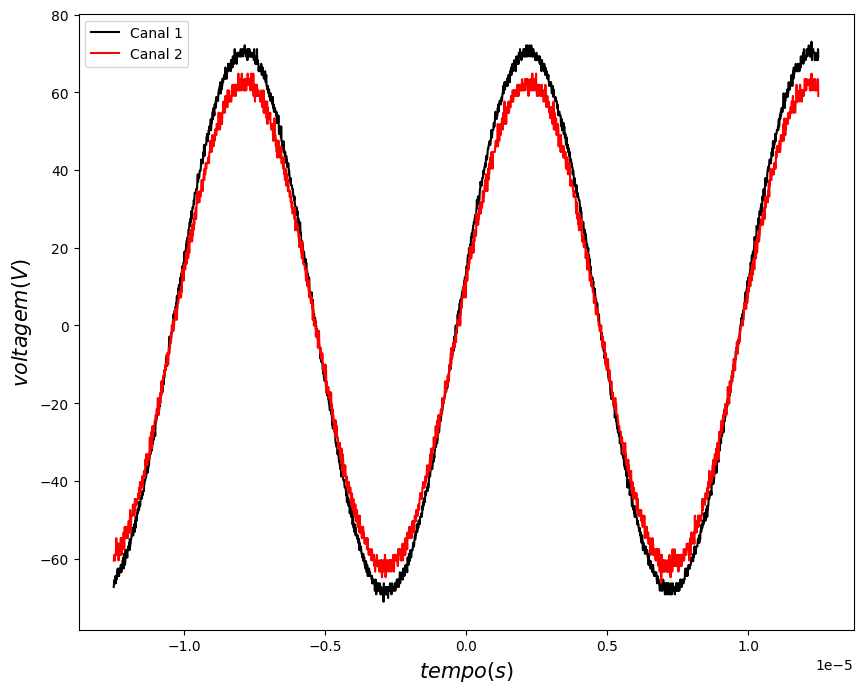

In [35]:
import numpy as np
from scipy.signal import argrelextrema

x1 = np.array(df1["time(ch1)"]).reshape(-1,1)
y1 = np.array(df1["voltage(ch1)"])
y1 = 30 * y1

x2 = np.array(df1["time(ch2)"]).reshape(-1,1)
y2 = np.array(df1["voltage(ch2)"])


max_x1 = argrelextrema(x1, np.greater)
max_x2 = argrelextrema(x2, np.greater)

print(x1)
print(x2)


plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.plot(x2, y2, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

In [36]:
df2 = pd.read_csv("data_ar_2.csv", header=0)
df2.head()

,time(ch1),voltage(ch1),time(ch2),voltage(ch2)
0,-0.000013,-0.8296,-0.000013,-14.608
1,-0.000012,-0.7808,-0.000012,-14.608
2,-0.000012,-0.7808,-0.000012,-14.608
3,-0.000012,-0.8784,-0.000012,-11.952
4,-0.000012,-0.7320,-0.000012,-10.624


[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


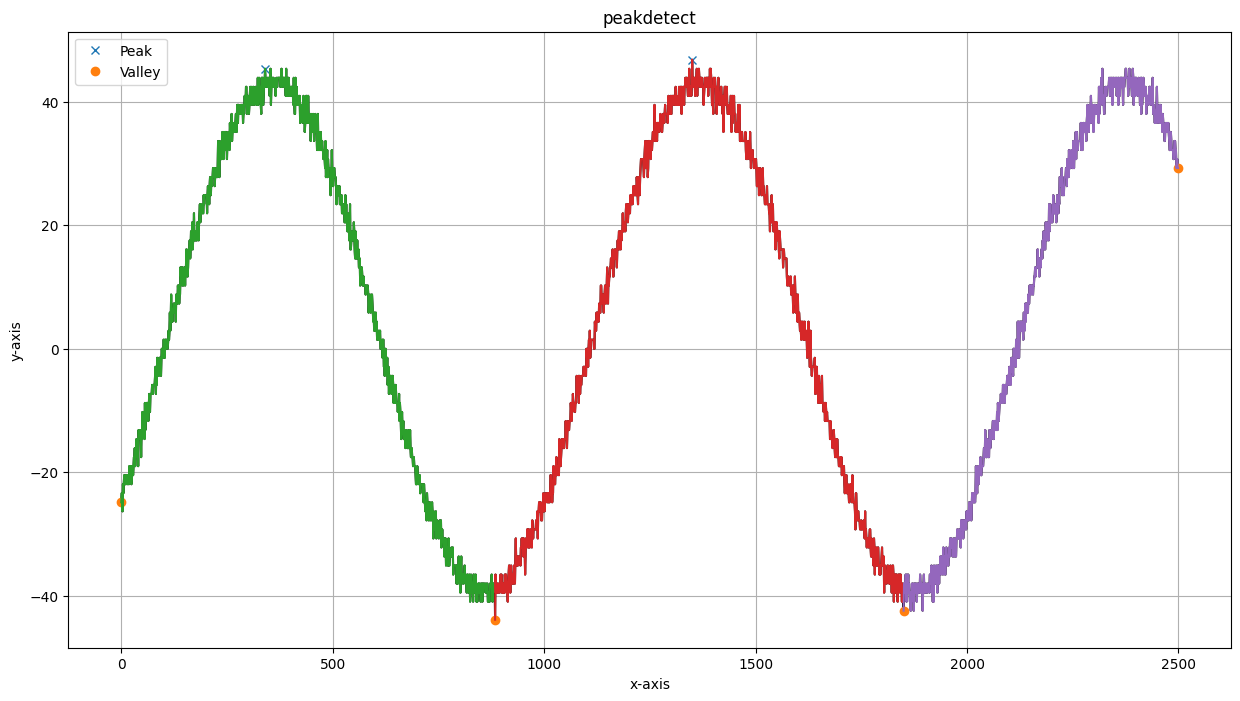

max [ 340 1350]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


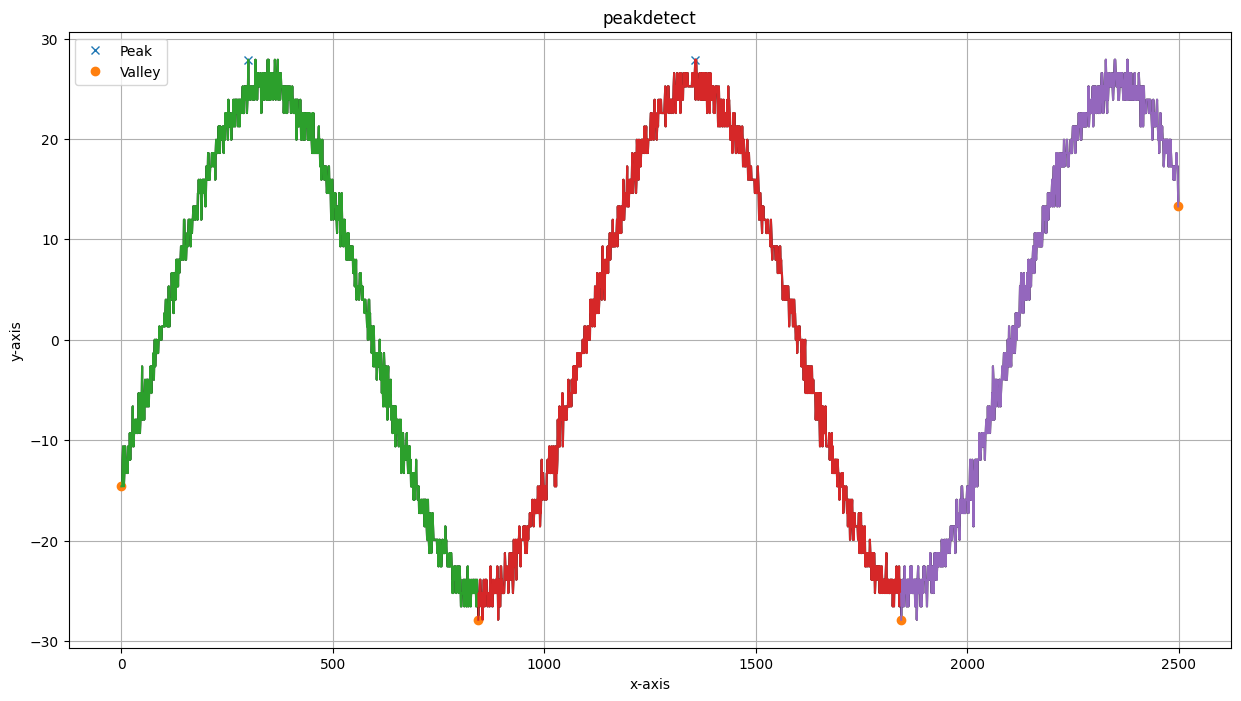

max [ 300 1357]
[7.e-08]
[1.01e-05]
[3.70333333e+08]


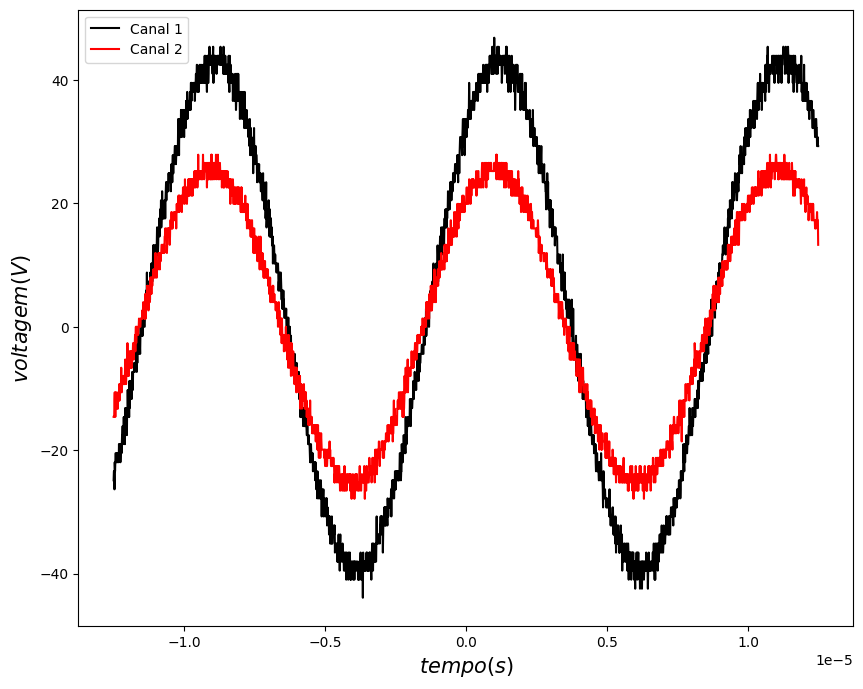

In [37]:
import numpy as np
from scipy.signal import argrelextrema
from findpeaks import findpeaks

x1 = np.array(df2["time(ch1)"]).reshape(-1,1)
y1 = np.array(df2["voltage(ch1)"])
y1 = 30 * y1

x2 = np.array(df2["time(ch2)"]).reshape(-1,1)
y2 = np.array(df2["voltage(ch2)"])

fp = findpeaks(method='peakdetect')
results = fp.fit(y1)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)


fp = findpeaks(method='peakdetect')
results = fp.fit(y2)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

dt1 = abs(x1[1350] - x2[1357])
T1 = x1[1350] - x1[340]
#dt1 = 1.4 * 10 **(-6)
ds = 0.55

v = (ds * T1 * (60 * 10 **6)) / (0.9 * 10 **(-6))
print(dt1)
print(T1)
print(v)


plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.plot(x2, y2, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

In [39]:
df3 = pd.read_csv("data_ar_3.csv", header=0)
df3.head()

,time(ch1),voltage(ch1),time(ch2),voltage(ch2)
0,-0.000013,-0.5688,-0.000013,-6.432
1,-0.000012,-0.5688,-0.000012,-7.504
2,-0.000012,-0.5688,-0.000012,-5.360
3,-0.000012,-0.6320,-0.000012,-7.504
4,-0.000012,-0.6320,-0.000012,-5.360


[8.9e-07]
[9.98e-06]
[4.3912e+08]


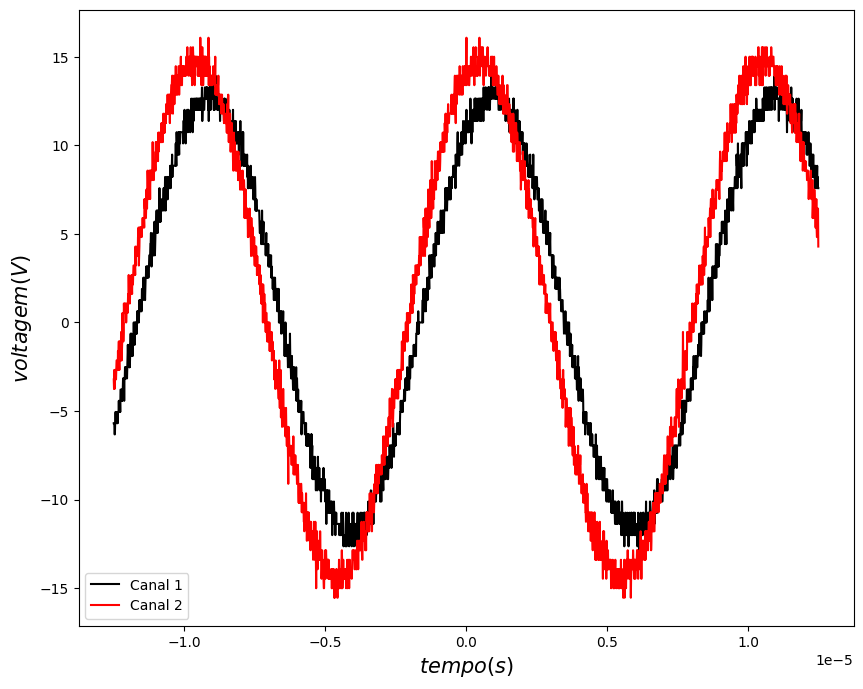

In [40]:
import numpy as np
from scipy.signal import argrelextrema
from findpeaks import findpeaks

x1 = np.array(df3["time(ch1)"]).reshape(-1,1)
y1 = np.array(df3["voltage(ch1)"])
y1 = 10 * y1

x2 = np.array(df3["time(ch2)"]).reshape(-1,1)
y2 = np.array(df3["voltage(ch2)"])
y2 = y2 / 2

dt1 = x1[1340] - x2[1251]
T1 = x1[1340] - x1[342]
#dt1 = 1.4 * 10 **(-6)
ds = 0.66

v = (ds * T1 * (60 * 10 **6)) / (0.9 * 10 **(-6))
print(dt1)
print(T1)
print(v)


plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.plot(x2, y2, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


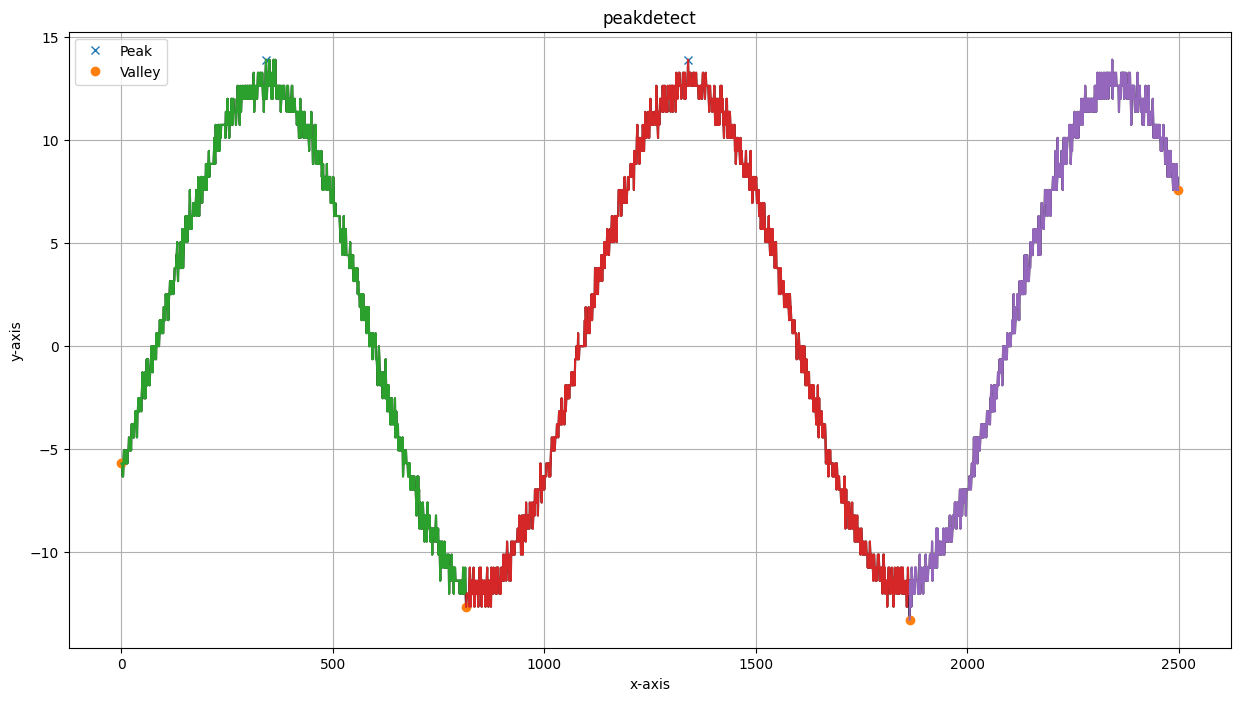

max [ 342 1340]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


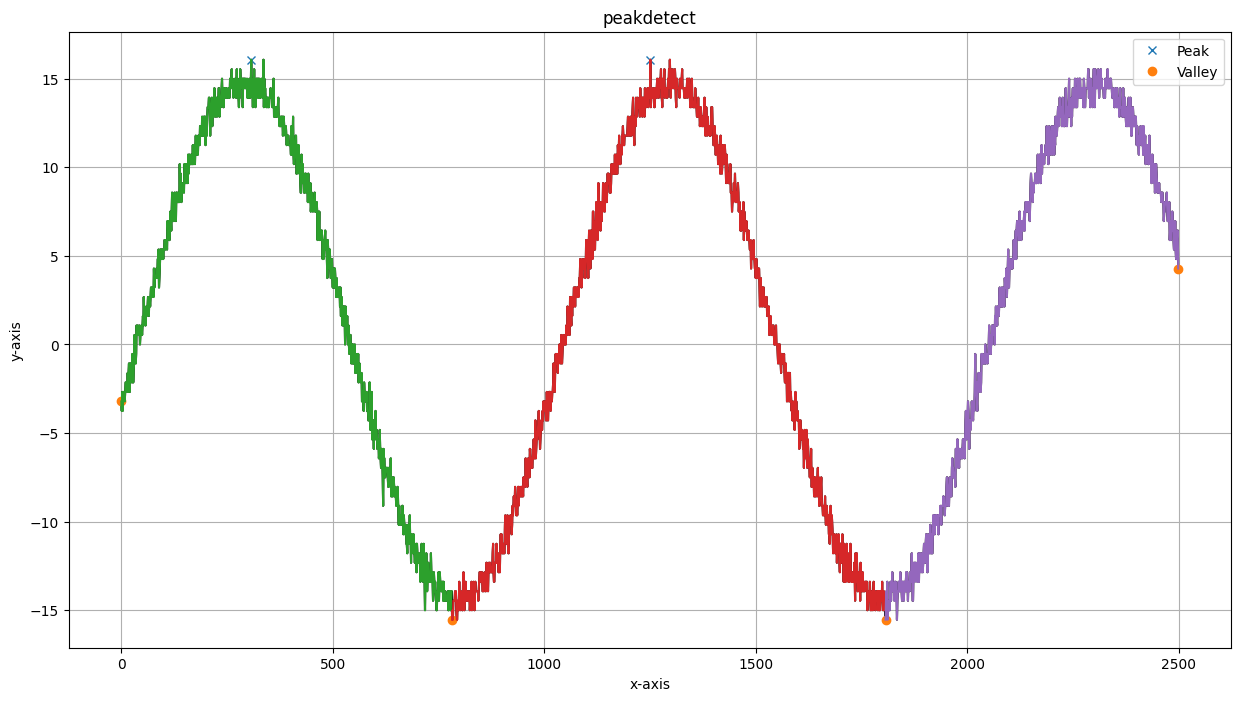

max [ 307 1251]


In [41]:
fp = findpeaks(method='peakdetect')
results = fp.fit(y1)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)


fp = findpeaks(method='peakdetect')
results = fp.fit(y2)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)


## Líquido 1 ##


In [42]:
df4 = pd.read_csv("data_liq_1.csv", header=0)
df4.head()

,time1(ch1),voltage1(ch1),time1(ch2),voltage1(ch2),time2(ch1),voltage2(ch1),time2(ch2),voltage2(ch2),time3(ch1),voltage3(ch1),time3(ch2),voltage3(ch2)
0,-0.000013,-0.8216,-0.000013,-15.008,-0.000013,-1.9880,-0.000013,-54.72,-0.000013,-2.4992,-0.000013,-62.656
1,-0.000012,-0.8848,-0.000012,-16.080,-0.000012,-2.0448,-0.000012,-54.72,-0.000013,-2.3856,-0.000013,-61.232
2,-0.000012,-0.9480,-0.000012,-15.008,-0.000012,-2.1016,-0.000012,-56.16,-0.000013,-2.4424,-0.000013,-61.232
3,-0.000012,-0.8216,-0.000012,-12.864,-0.000012,-2.0448,-0.000012,-54.72,-0.000013,-2.3288,-0.000013,-62.656
4,-0.000012,-0.8216,-0.000012,-13.936,-0.000012,-2.0448,-0.000012,-54.72,-0.000013,-2.4424,-0.000013,-61.232


[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


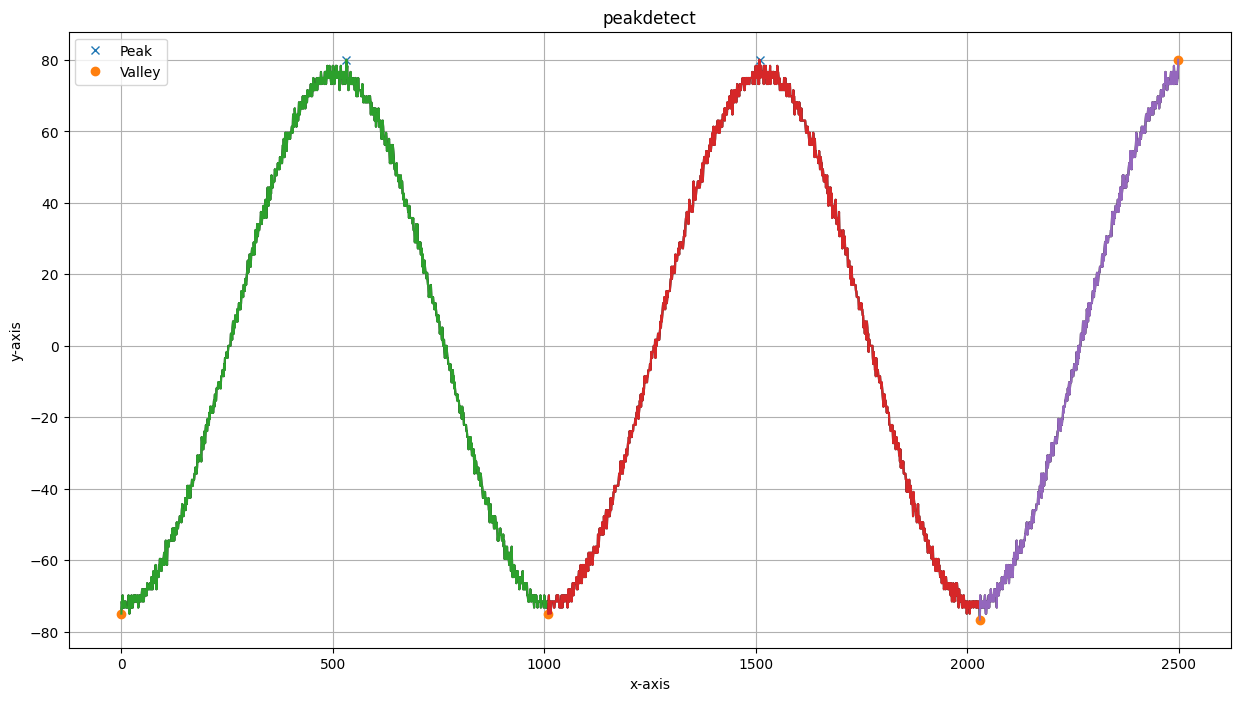

max [ 532 1509]
[-9.08e-06]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


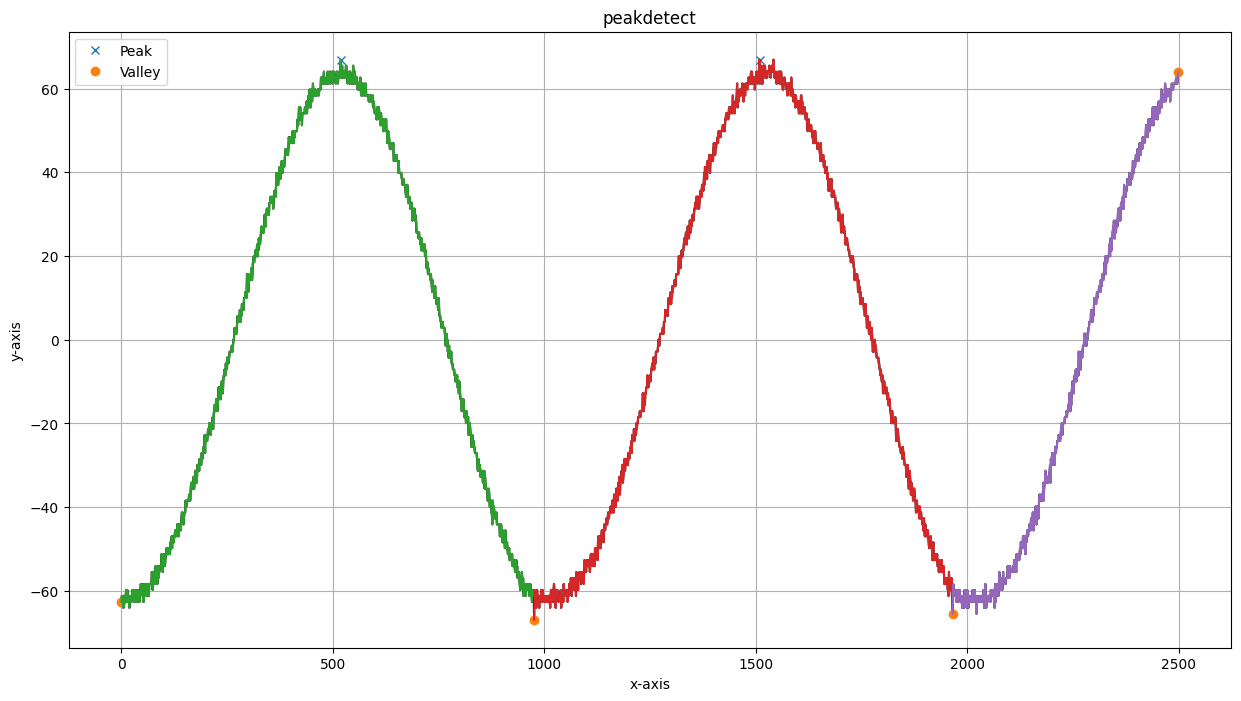

max [ 519 1509]
[-9.43e-06]
[1.3e-07]
[9.77e-06]
[2.32968337]
[1.28683778e+08]


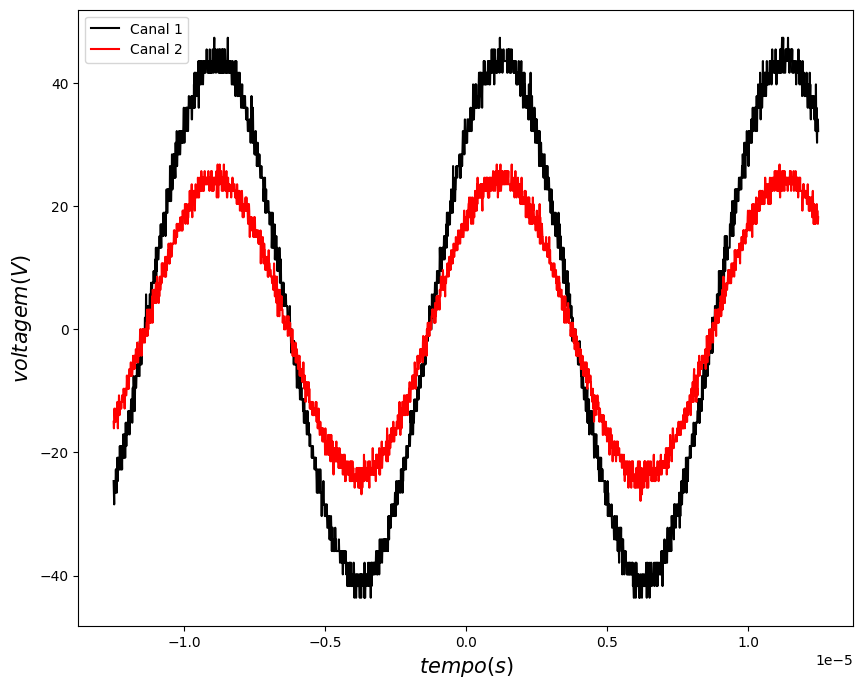

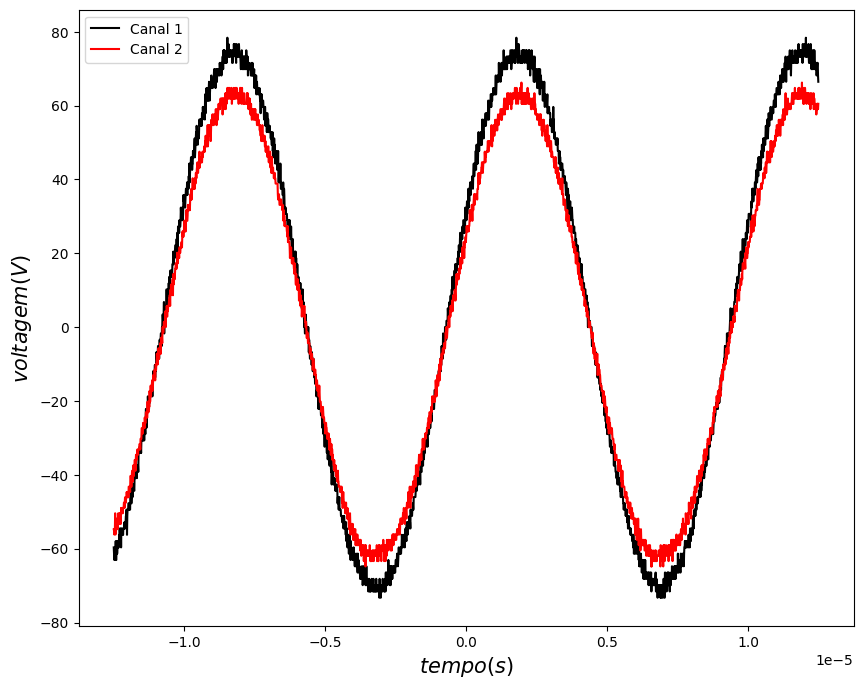

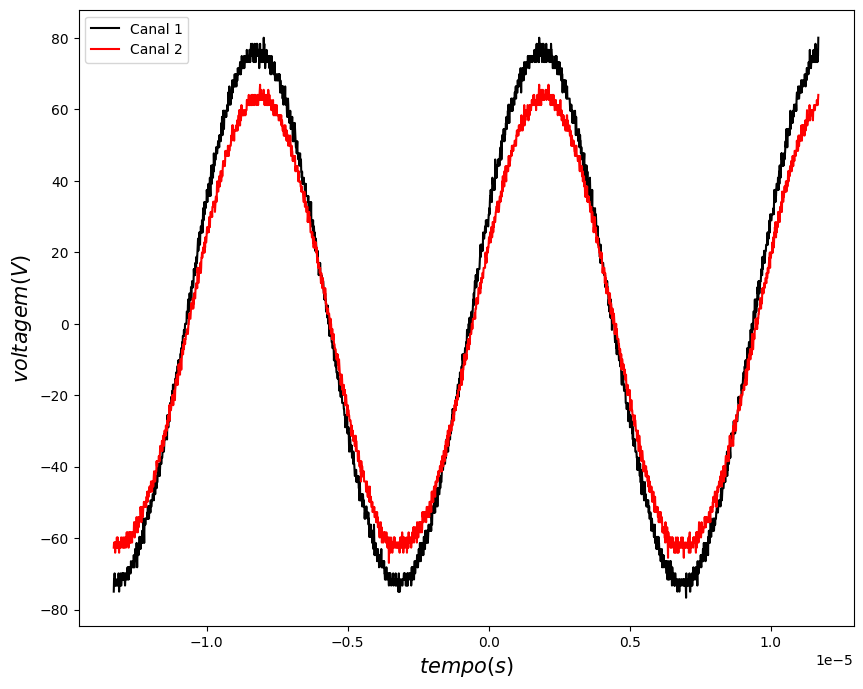

In [43]:
import numpy as np
from scipy.signal import argrelextrema
from scipy import constants

x1 = np.array(df4["time1(ch1)"]).reshape(-1,1)
y1 = np.array(df4["voltage1(ch1)"])
x2 = np.array(df4["time1(ch2)"]).reshape(-1,1)
y2 = np.array(df4["voltage1(ch2)"])
y1 = 30 * y1

x3 = np.array(df4["time2(ch1)"]).reshape(-1,1)
y3 = np.array(df4["voltage2(ch1)"])
x4 = np.array(df4["time2(ch2)"]).reshape(-1,1)
y4 = np.array(df4["voltage2(ch2)"])
y3 = 30 * y3

x5 = np.array(df4["time3(ch1)"]).reshape(-1,1)
y5 = np.array(df4["voltage3(ch1)"])
x6 = np.array(df4["time3(ch2)"]).reshape(-1,1)
y6 = np.array(df4["voltage3(ch2)"])
y5 = 30 * y5

fp = findpeaks(method='peakdetect')
results = fp.fit(y5)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)
print(x1[342])

fp = findpeaks(method='peakdetect')
results = fp.fit(y6)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)
print(x2[307])

dt1 = abs(x5[532] - x6[519])
T1 = x5[1509] - x5[532]
#dt1 = 1.4 * 10 **(-6)
d = 0.05

v = (ds * T1 * (60 * 10 **6)) / dt1
n = 1 + constants.c * (dt1 / (d *  (60 * 10 **6) * T1))
print(dt1)
print(T1)
print(n)
print(constants.c / n)

plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.plot(x2, y2, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x3, y3, color='black',label='Canal 1')
plt.plot(x4, y4, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x5, y5, color='black',label='Canal 1')
plt.plot(x6, y6, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

## Líquido 2 ##

In [44]:
df5 = pd.read_csv("data_liq_2.csv", header=0)
df5.head()

,time1(ch1),voltage1(ch1),time1(ch2),voltage1(ch2),time2(ch1),voltage2(ch1),time2(ch2),voltage2(ch2)
0,-0.000013,-2.1672,-0.000013,-61.824,-0.000013,-2.2176,-0.000013,-63.296
1,-0.000013,-2.1672,-0.000013,-61.824,-0.000013,-2.3184,-0.000013,-61.824
2,-0.000013,-2.1168,-0.000013,-60.352,-0.000013,-2.2680,-0.000013,-61.824
3,-0.000013,-2.2680,-0.000013,-63.296,-0.000013,-2.2680,-0.000013,-61.824
4,-0.000013,-2.2176,-0.000013,-60.352,-0.000013,-2.2680,-0.000013,-61.824


[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


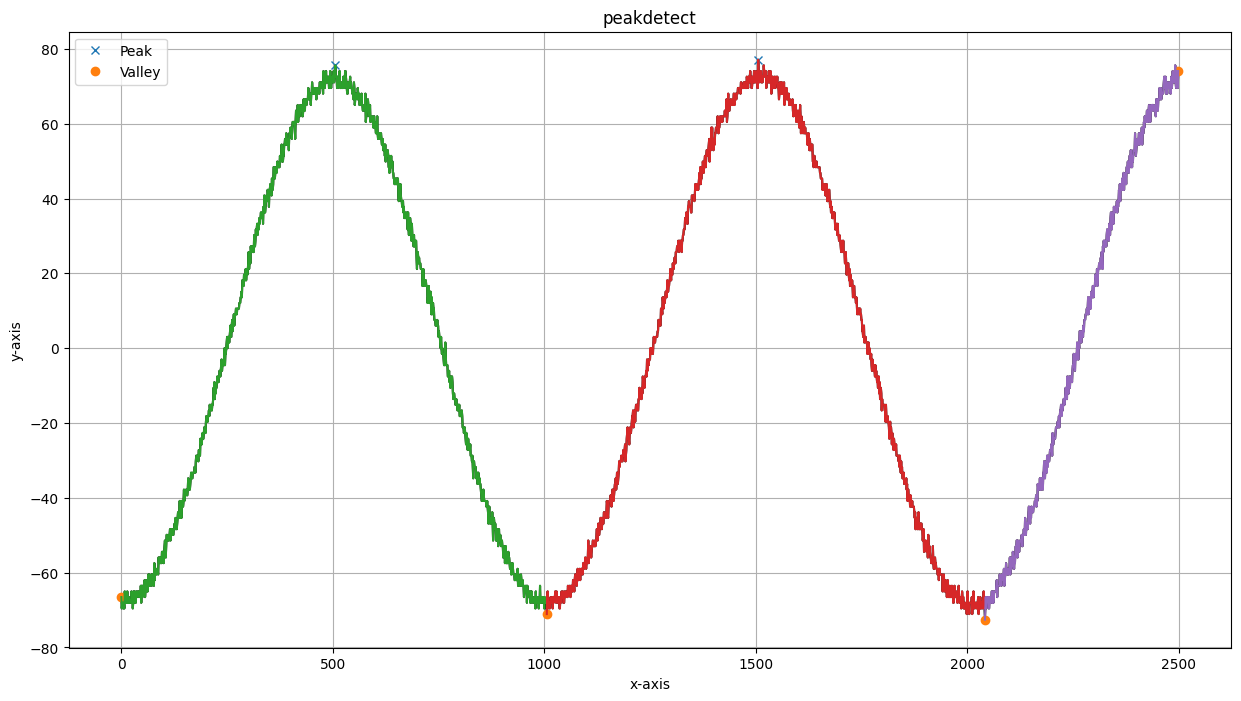

max [ 506 1506]
[-9.88e-06]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


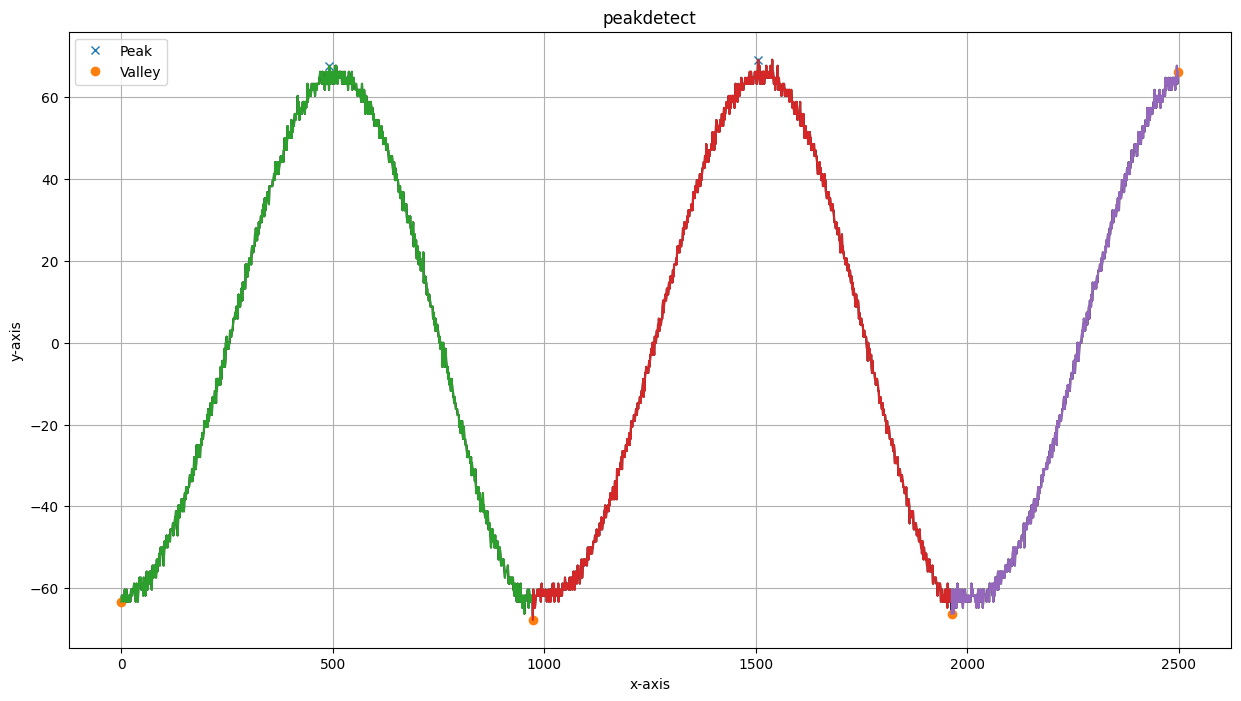

max [ 492 1506]
[-1.023e-05]
[1.4e-07]
[1.e-05]
[2.39903147]
[1.24963954e+08]


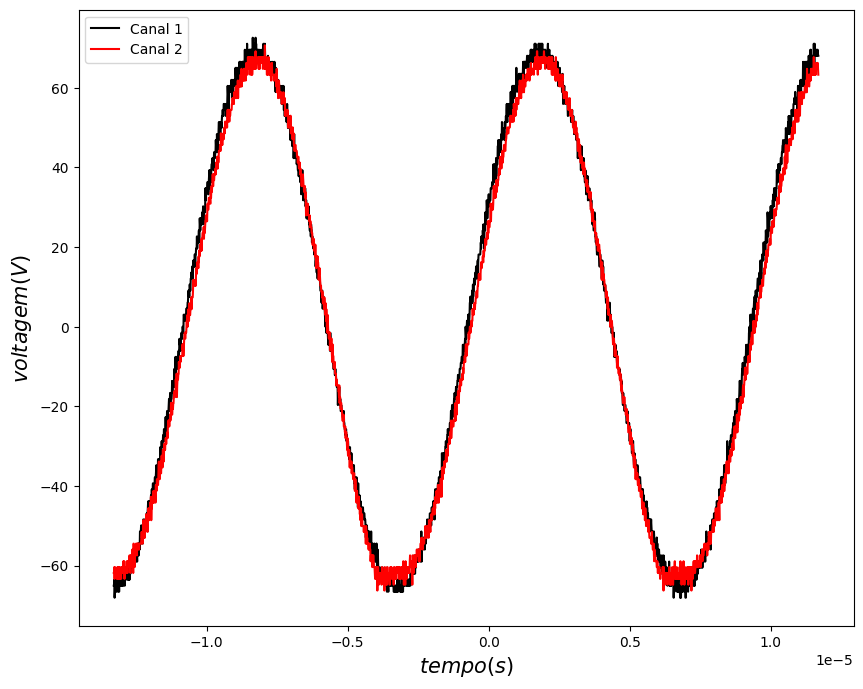

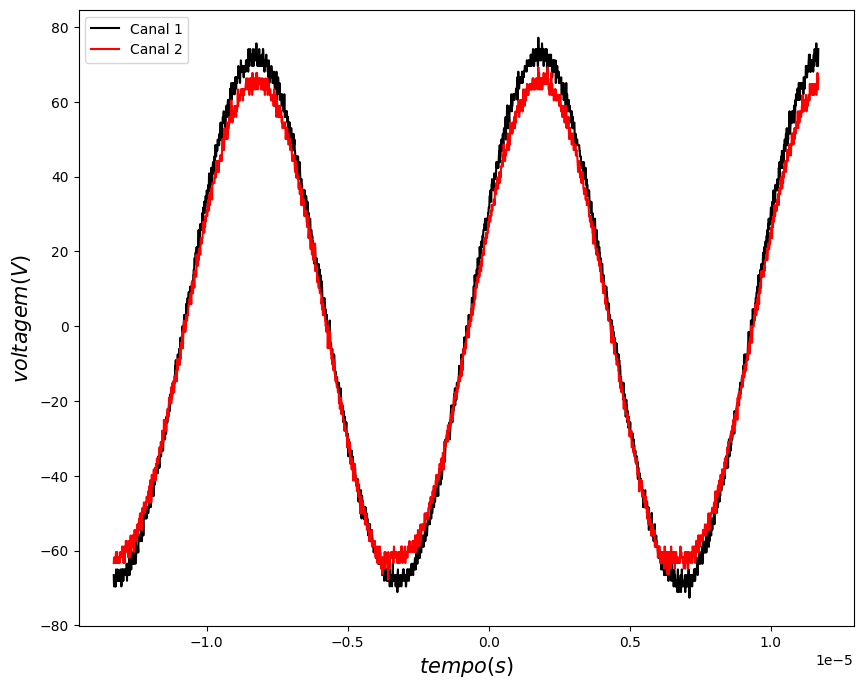

In [45]:
import numpy as np
from scipy.signal import argrelextrema

x1 = np.array(df5["time1(ch1)"]).reshape(-1,1)
y1 = np.array(df5["voltage1(ch1)"])
x2 = np.array(df5["time1(ch2)"]).reshape(-1,1)
y2 = np.array(df5["voltage1(ch2)"])
y1 = 30 * y1

x3 = np.array(df5["time2(ch1)"]).reshape(-1,1)
y3 = np.array(df5["voltage2(ch1)"])
x4 = np.array(df5["time2(ch2)"]).reshape(-1,1)
y4 = np.array(df5["voltage2(ch2)"])
y3 = 30 * y3

fp = findpeaks(method='peakdetect')
results = fp.fit(y3)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)
print(x1[342])

fp = findpeaks(method='peakdetect')
results = fp.fit(y4)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)
print(x2[307])

dt1 = abs(x3[506] - x4[492])
T1 = x3[1506] - x3[506]
#dt1 = 1.4 * 10 **(-6)
d = 0.05

v = (ds * T1 * (60 * 10 **6)) / dt1
n = 1 + constants.c * (dt1 / (d *  (60 * 10 **6) * T1))
print(dt1)
print(T1)
print(n)
print(constants.c / n)

plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.plot(x2, y2, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x3, y3, color='black',label='Canal 1')
plt.plot(x4, y4, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()


## Sólido 1 ##

In [47]:
df6 = pd.read_csv("data_sol_1.csv", header=0)
df6.head()

,time1(ch1),voltage1(ch1),time1(ch2),voltage1(ch2),time2(ch1),voltage2(ch1),time2(ch2),voltage2(ch2)
0,-0.000013,-2.2176,-0.000013,-61.824,-0.000013,-2.2176,-0.000013,-61.824
1,-0.000013,-2.1672,-0.000013,-61.824,-0.000013,-2.2176,-0.000013,-61.824
2,-0.000013,-2.2176,-0.000013,-60.352,-0.000013,-2.2680,-0.000013,-63.296
3,-0.000013,-2.1672,-0.000013,-64.768,-0.000013,-2.2680,-0.000013,-61.824
4,-0.000013,-2.1672,-0.000013,-60.352,-0.000013,-2.3184,-0.000013,-63.296


[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


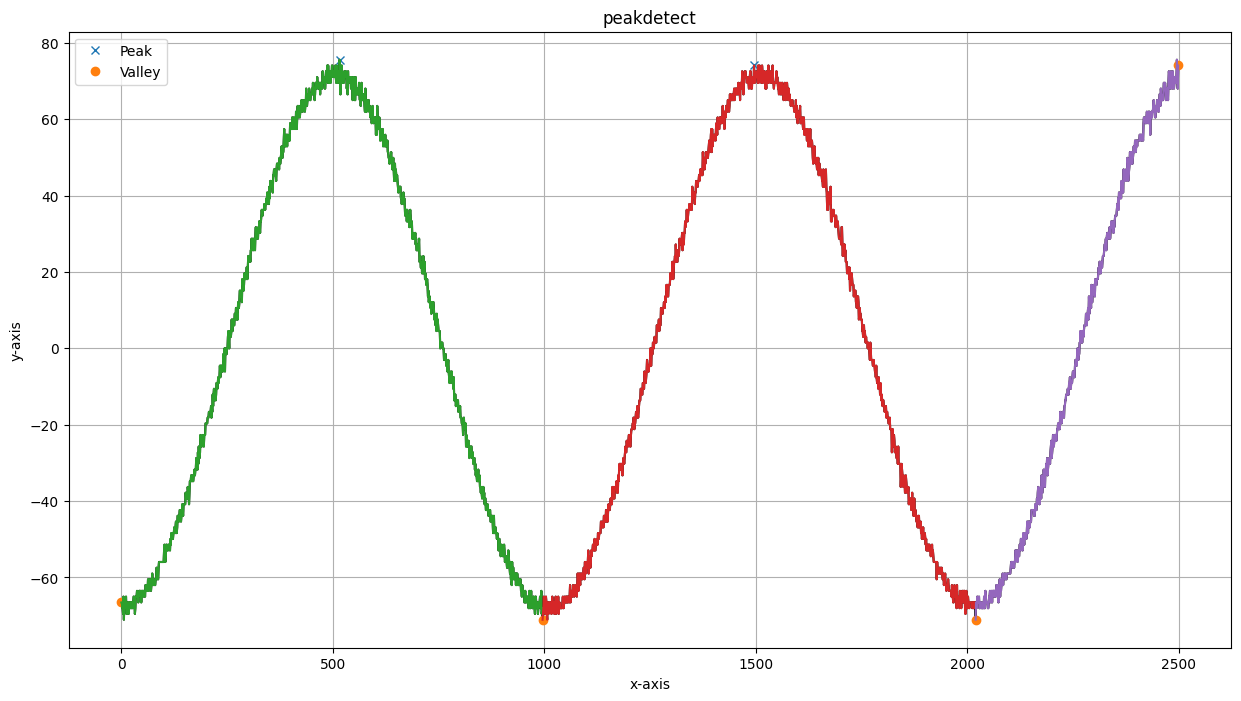

max [ 516 1496]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


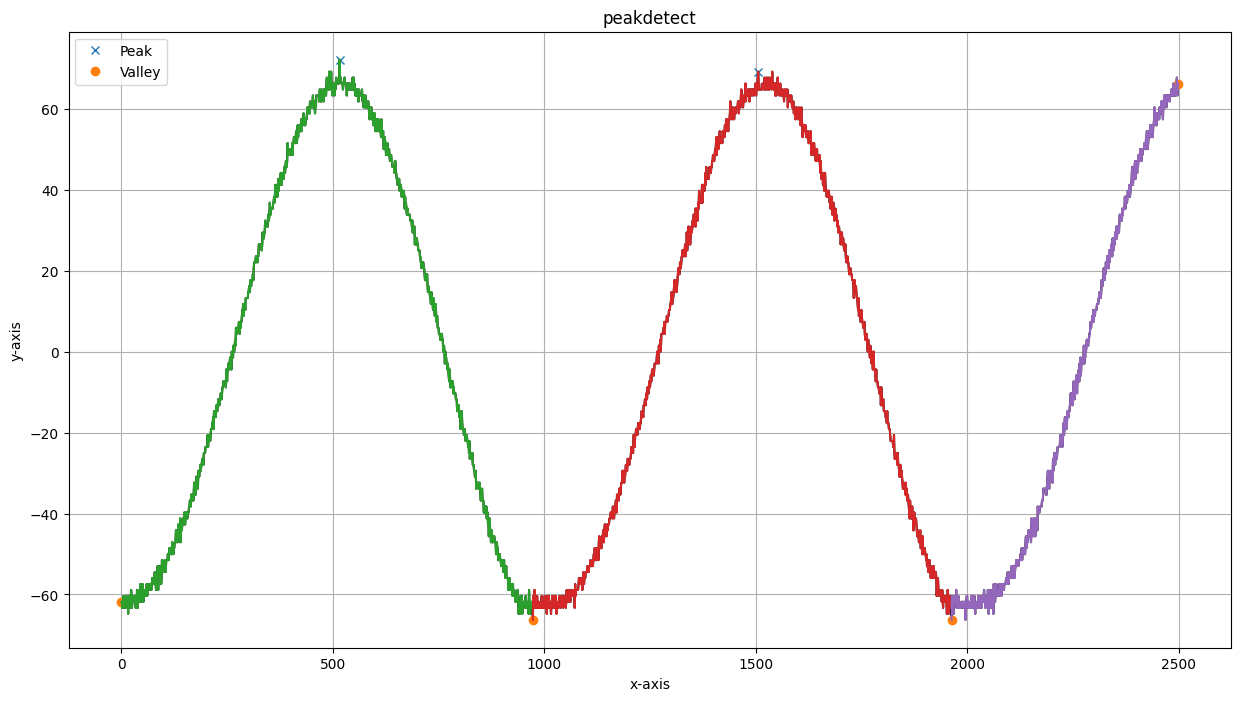

max [ 516 1506]
[1.e-07]
[9.8e-06]
[2.01970224]
[1.48433988e+08]


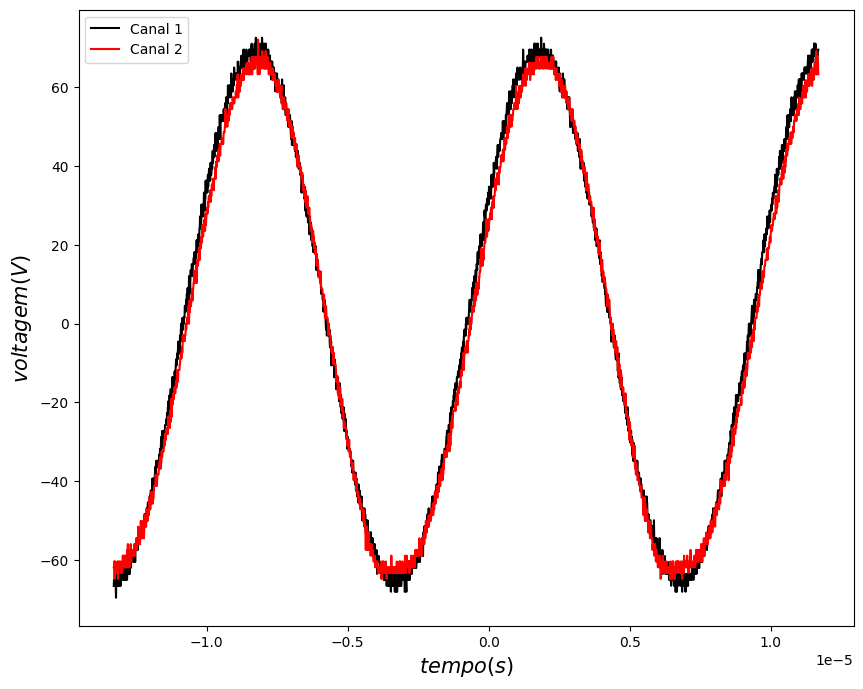

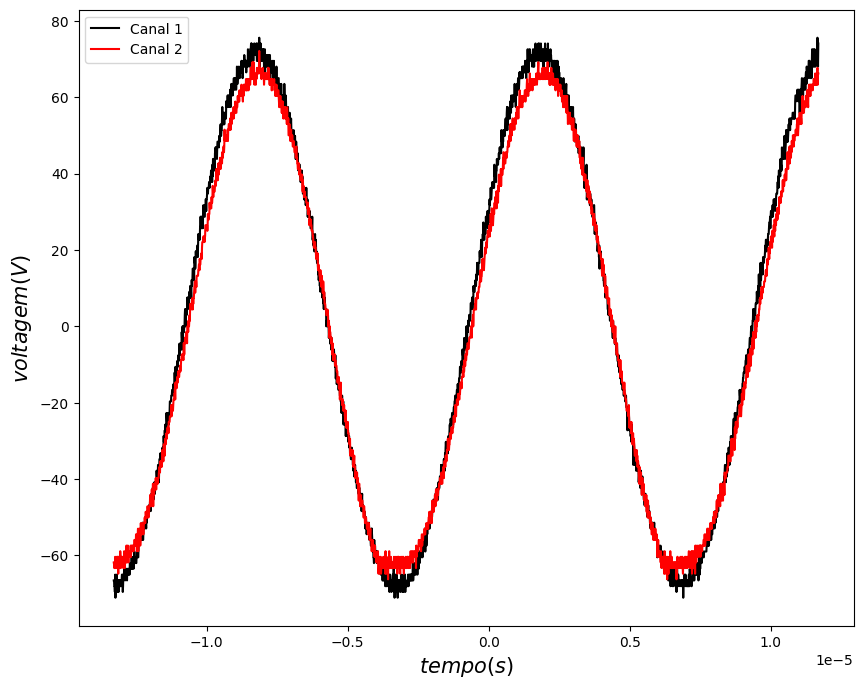

In [48]:
import numpy as np
from scipy.signal import argrelextrema

x1 = np.array(df6["time1(ch1)"]).reshape(-1,1)
y1 = np.array(df6["voltage1(ch1)"])
x2 = np.array(df6["time1(ch2)"]).reshape(-1,1)
y2 = np.array(df6["voltage1(ch2)"])
y1 = 30 * y1

x3 = np.array(df6["time2(ch1)"]).reshape(-1,1)
y3 = np.array(df6["voltage2(ch1)"])
x4 = np.array(df6["time2(ch2)"]).reshape(-1,1)
y4 = np.array(df6["voltage2(ch2)"])
y3 = 30 * y3

fp = findpeaks(method='peakdetect')
results = fp.fit(y3)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

fp = findpeaks(method='peakdetect')
results = fp.fit(y4)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)


dt1 = abs(x3[1496] - x4[1506])
T1 = x3[1496] - x3[516]
#dt1 = 1.4 * 10 **(-6)
d = 0.05

v = (ds * T1 * (60 * 10 **6)) / dt1
n = 1 + constants.c * (dt1 / (d *  (60 * 10 **6) * T1))
print(dt1)
print(T1)
print(n)
print(constants.c / n)

plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.plot(x2, y2, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x3, y3, color='black',label='Canal 1')
plt.plot(x4, y4, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()


## Sólido 2 ##

In [49]:
df7 = pd.read_csv("data_sol_2.csv", header=0)
df7.head()

,time1(ch1),voltage1(ch1),time1(ch2),voltage1(ch2),time2(ch1),voltage2(ch1),time2(ch2),voltage2(ch2)
0,-0.000013,-2.2680,-0.000013,-61.824,-0.000013,-2.2680,-0.000013,-61.824
1,-0.000013,-2.1672,-0.000013,-61.824,-0.000013,-2.2680,-0.000013,-61.824
2,-0.000013,-2.1168,-0.000013,-61.824,-0.000013,-2.2176,-0.000013,-63.296
3,-0.000013,-2.2680,-0.000013,-61.824,-0.000013,-2.3184,-0.000013,-61.824
4,-0.000013,-2.2176,-0.000013,-63.296,-0.000013,-2.3184,-0.000013,-61.824


[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


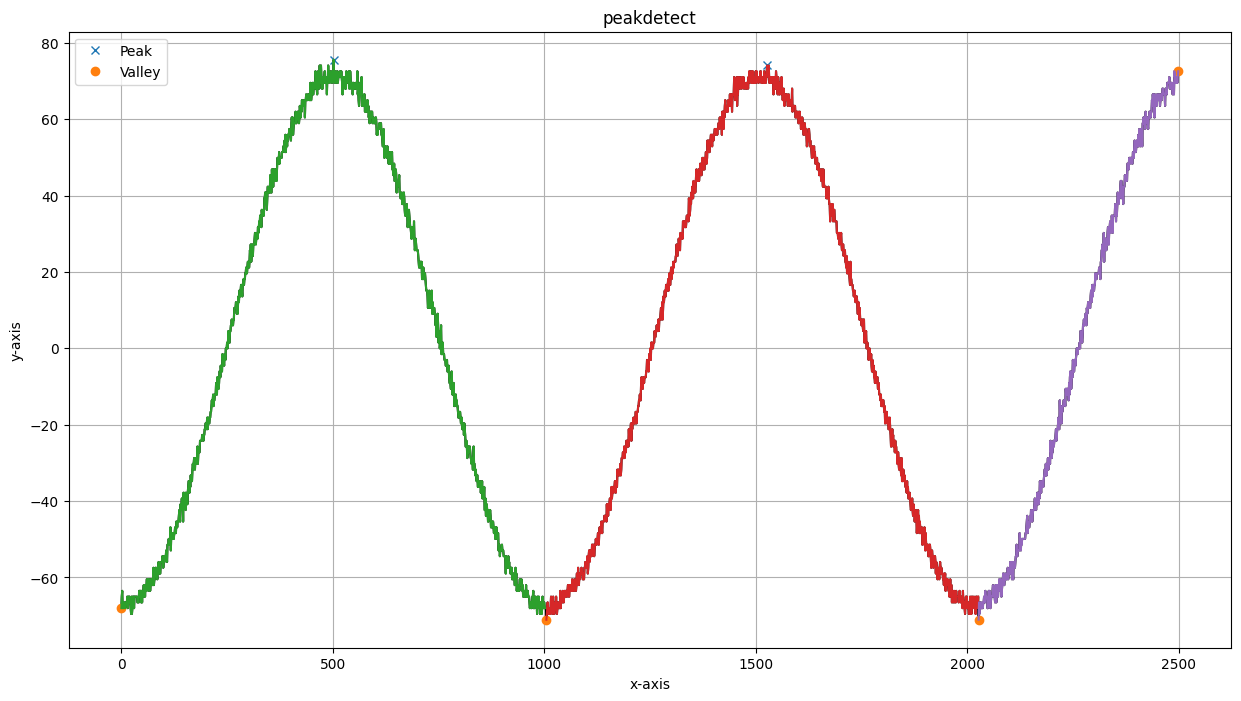

max [ 502 1527]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


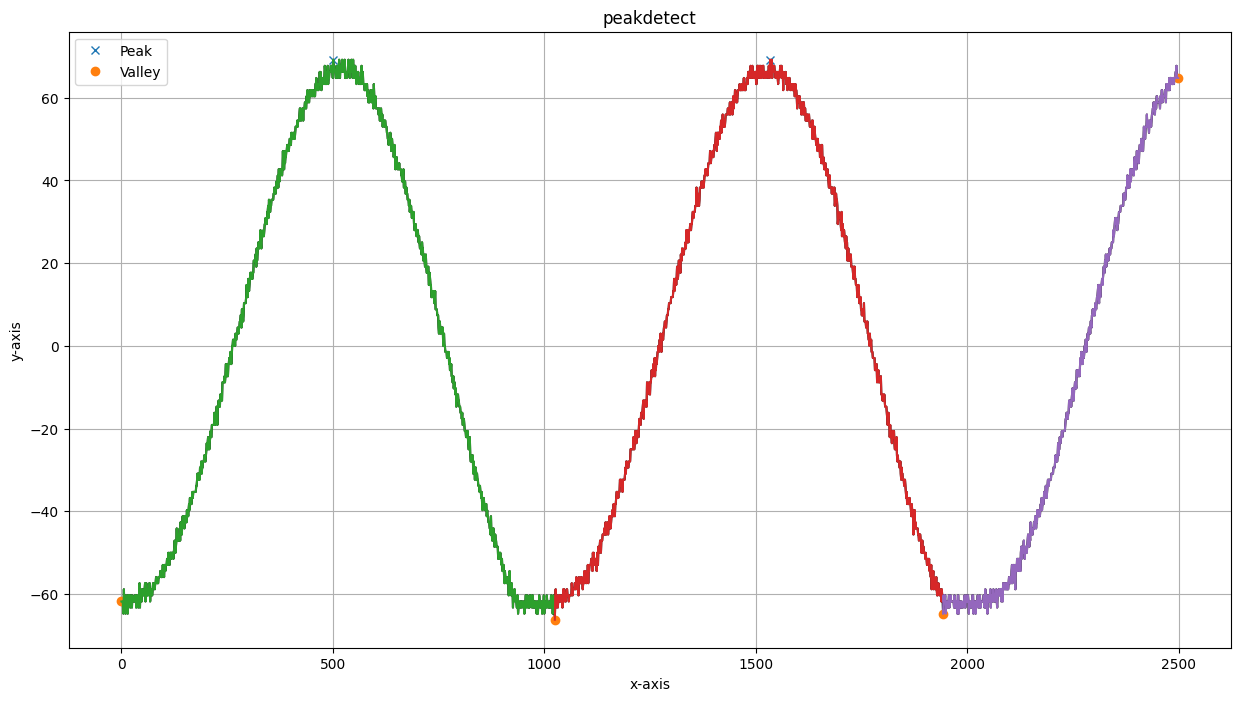

max [ 501 1534]
[7.e-08]
[1.025e-05]
[1.68245438]
[1.78187571e+08]


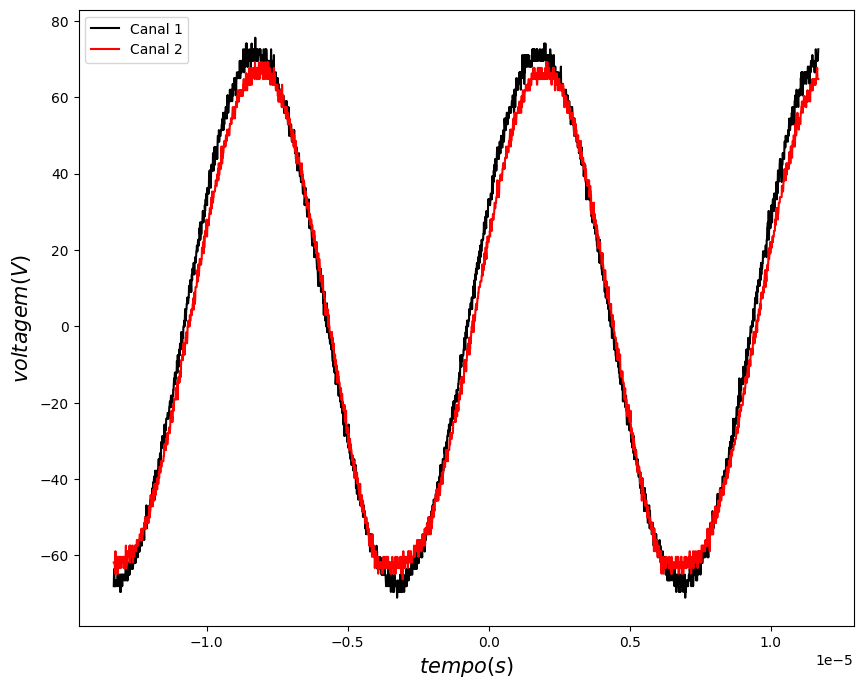

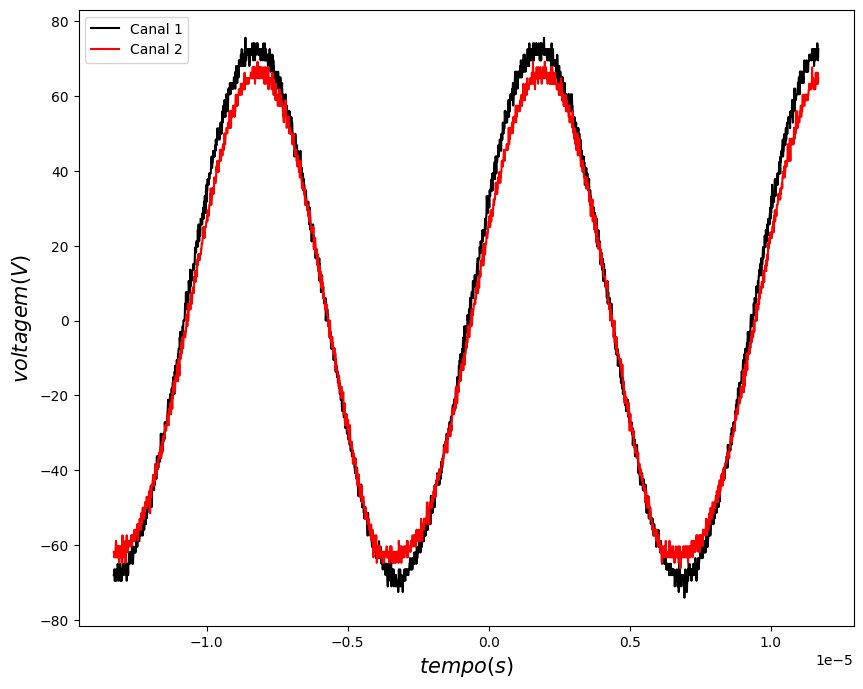

In [50]:
import numpy as np
from scipy.signal import argrelextrema

x1 = np.array(df7["time1(ch1)"]).reshape(-1,1)
y1 = np.array(df7["voltage1(ch1)"])
x2 = np.array(df7["time1(ch2)"]).reshape(-1,1)
y2 = np.array(df7["voltage1(ch2)"])
y1 = 30 * y1

x3 = np.array(df7["time2(ch1)"]).reshape(-1,1)
y3 = np.array(df7["voltage2(ch1)"])
x4 = np.array(df7["time2(ch2)"]).reshape(-1,1)
y4 = np.array(df7["voltage2(ch2)"])
y3 = 30 * y3

fp = findpeaks(method='peakdetect')
results = fp.fit(y1)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)

fp = findpeaks(method='peakdetect')
results = fp.fit(y2)
# Plot
fp.plot1d()
df_interp = results["df"]
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("max", max_peaks)


dt1 = abs(x1[1527] - x2[1534])
T1 = x1[1527] - x1[502]
#dt1 = 1.4 * 10 **(-6)
d = 0.05

v = (ds * T1 * (60 * 10 **6)) / dt1
n = 1 + constants.c * (dt1 / (d *  (60 * 10 **6) * T1))
print(dt1)
print(T1)
print(n)
print(constants.c / n)

plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.plot(x2, y2, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x3, y3, color='black',label='Canal 1')
plt.plot(x4, y4, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()
